In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/btc_gold_oil_sp500_clean.csv'
data = pd.read_csv(file_path)



In [41]:
data.isna().sum()


Unnamed: 0                    0
Date                          0
Open_btc                      0
High_btc                      0
Low_btc                       0
Close_btc                     0
Adj Close_btc                 0
Volume_btc                    0
volatility_btc                0
hc_change_btc                 0
lc_change_btc                 0
price_change_percent_btc      0
TargetClass_btc               0
Open_gold                     0
High_gold                     0
Low_gold                      0
Close_gold                    0
Adj Close_gold                0
Volume_gold                   0
volatility_gold               0
hc_change_gold                0
lc_change_gold                0
price_change_percent_gold     0
Open_oil                      0
High_oil                      0
Low_oil                       0
Close_oil                     0
Adj Close_oil                 0
Volume_oil                    0
volatility_oil                0
hc_change_oil                 0
lc_chang

# Bitcoin (BTC) Columns:
Open_btc: The opening price of Bitcoin on the given date.

High_btc: The highest price of Bitcoin on the given date.

Low_btc: The lowest price of Bitcoin on the given date.

Close_btc: The closing price of Bitcoin on the given date.

Adj Close_btc: The adjusted closing price of Bitcoin, which accounts for dividends, stock splits, etc.

Volume_btc: The total volume of Bitcoin traded on the given date.

volatility_btc: The volatility of Bitcoin prices, calculated based on the price range for the day.

hc_change_btc: The percentage change from the highest price of the previous day to the close price of the current day.

lc_change_btc: The percentage change from the lowest price of the previous day to the close price of the current day.

price_change_percent_btc: The percentage change in Bitcoin's price from the previous day's close.

TargetClass_btc: A target classification for Bitcoin, possibly indicating whether the price is expected to go up or down (the specific meaning would depend on the dataset's purpose).

# Gold, Oil, S&P500 have identical labeling

# Investigate Summary statistics:

<Figure size 1200x800 with 0 Axes>

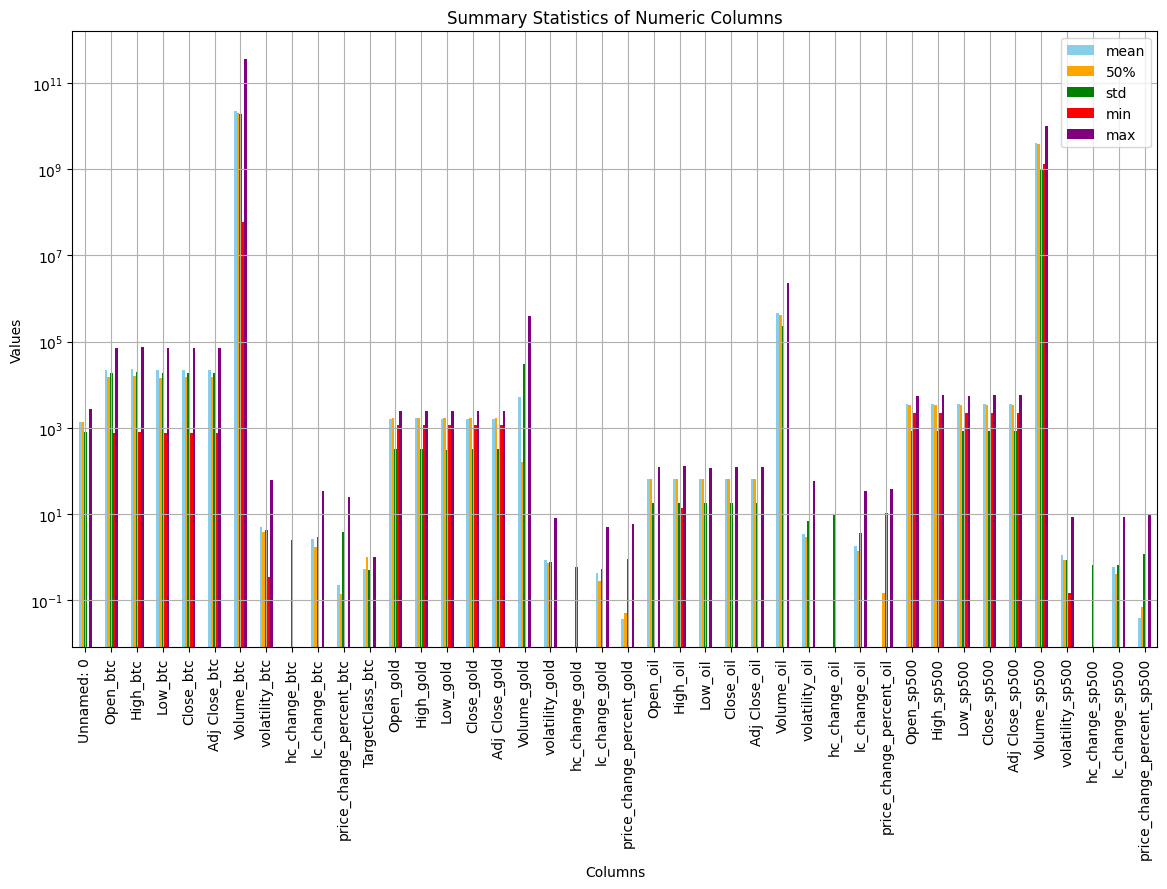

In [29]:
# Generate summary statistics
summary_stats = data.describe()

# Plot the summary statistics
plt.figure(figsize=(12, 8))

# Plot for mean, median, std, min, and max for numeric columns
summary_stats.loc[['mean', '50%', 'std', 'min', 'max']].T.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Summary Statistics of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.grid(True)
plt.semilogy()
plt.show()

#summary_stats


1) BTC volatility > gold, oil and sp500

In [42]:
def plot_summary_statistics(df, asset='btc', column='Open', plot_type='bar',
                           figsize=(6,3)):
    """
    Plots the summary statistics (mean, median, std, min, and max) or a boxplot for a specified asset.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    asset (str): The asset to plot. Acceptable values are 'btc', 'gold', 'oil', 'sp500'.
    column (str): The specific column to plot across different assets if asset is None.
    plot_type (str): The type of plot to generate, either 'bar' for summary statistics or 'box' for a boxplot.
    """
    # Select the relevant columns for the asset
    if asset:
        asset_columns = [f'Open_{asset}', f'High_{asset}', f'Low_{asset}', f'Close_{asset}',
                         f'Volume_{asset}', f'volatility_{asset}', f'hc_change_{asset}', f'lc_change_{asset}',
                         f'price_change_percent_{asset}']
        title = asset.upper()
        
    else:  # Use column input for multiple assets
        asset_columns = [f'{column}_btc', f'{column}_gold', f'{column}_oil', f'{column}_sp500']
        title = column.capitalize()

    if plot_type == 'bar':
        # Generate summary statistics
        summary_stats = df[asset_columns].describe()

        # Plot the summary statistics (mean, median (50%), std, min, and max)
        plt.figure(figsize=figsize)
        summary_stats.loc[['mean', '50%', 'std', 'min', 'max']].T.plot(
            kind='bar',
            figsize=(14, 8),
            color=['skyblue', 'orange', 'green', 'red', 'purple'],
            ax=plt.gca()
        )
        plt.xlabel('Price Type')
        plt.ylabel('Values')
        plt.xticks(rotation=90)
        plt.grid(True)
        
    elif plot_type == 'box':
        # Plot a boxplot for the selected columns
        plt.figure(figsize=figsize)
        df[asset_columns].plot(kind='box', figsize=(14, 8), ax=plt.gca())
        plt.ylabel('Values')
        plt.grid(True)
    else:
        raise ValueError("plot_type must be either 'bar' or 'box'.")

    plt.title(f'{title} Summary Statistics' if plot_type == 'bar' else f'{title} Boxplot')
    plt.show()



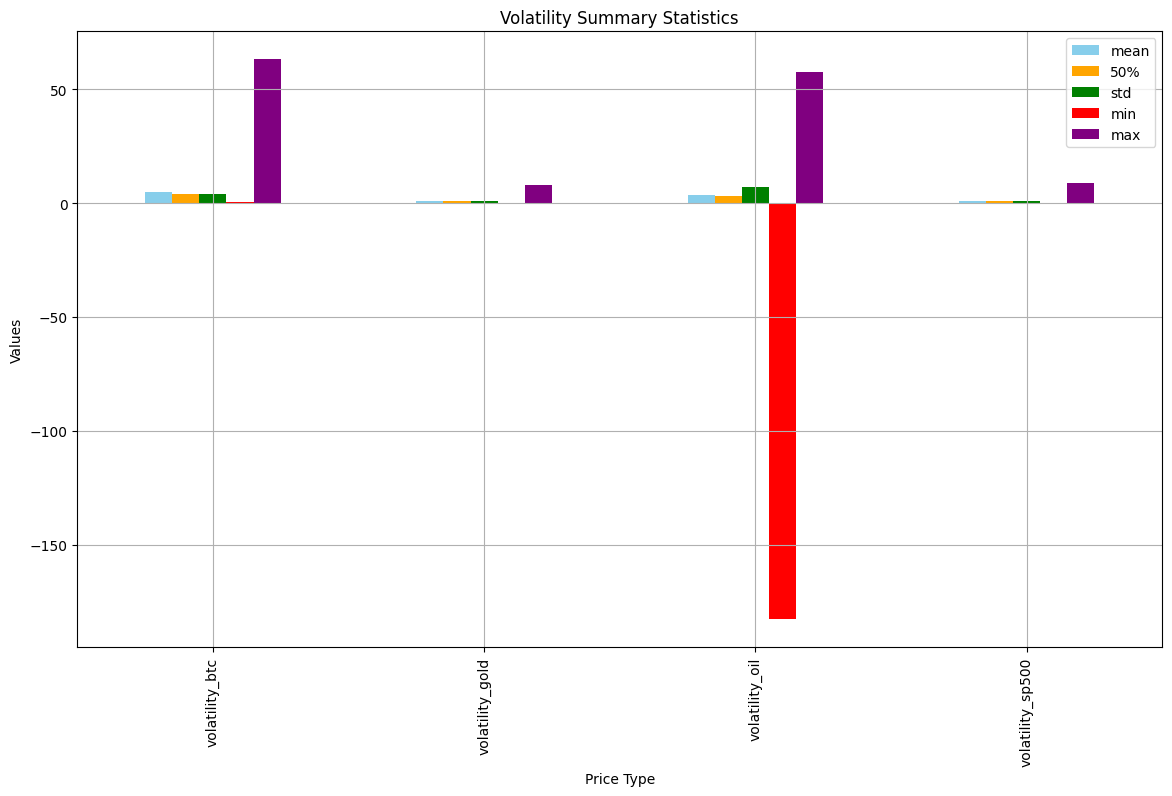

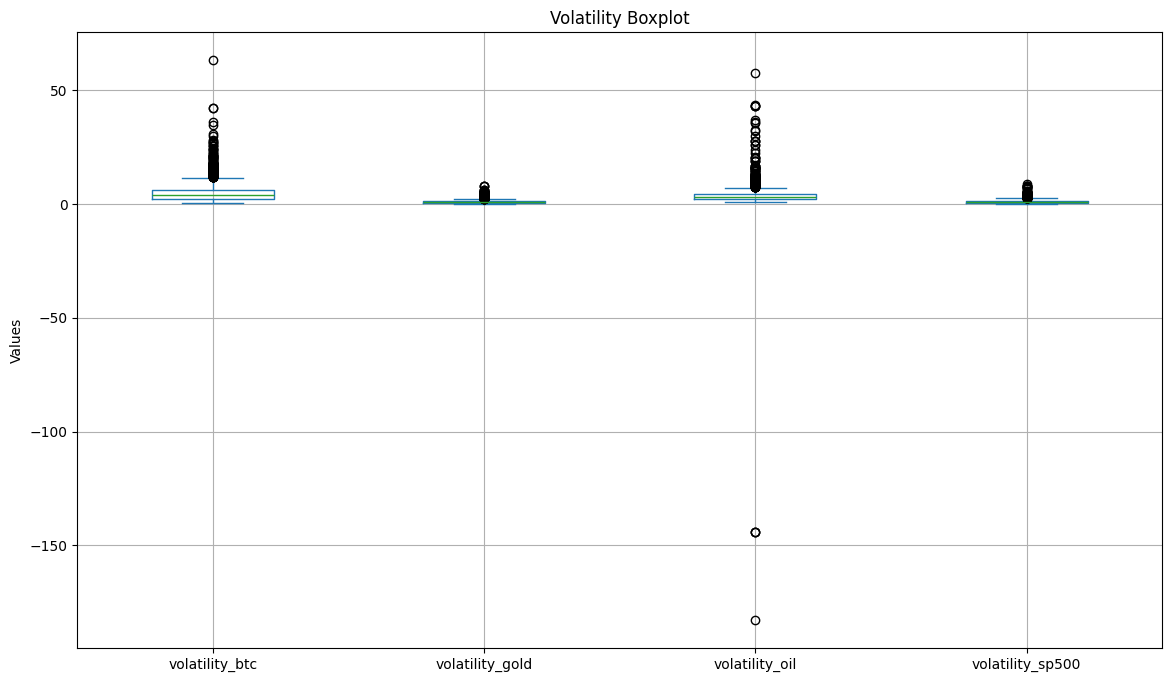

In [44]:
# Example usage of the function
plot_summary_statistics(data, asset=None,column='volatility', plot_type='bar')
plot_summary_statistics(data, asset=None,column='volatility', plot_type='box')


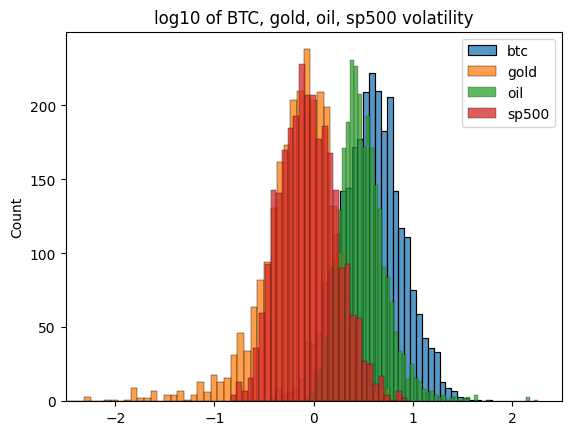

In [95]:
import seaborn as sns
import numpy as np

fig,ax=plt.subplots()

sns.histplot(np.log10(np.abs(data.volatility_btc.values)+0.000001),label='btc',ax=ax)
sns.histplot(np.log10(np.abs(data.volatility_gold.values)+0.000001),label='gold',ax=ax)
sns.histplot(np.log10(np.abs(data.volatility_oil.values)+0.000001),label='oil',ax=ax)
sns.histplot(np.log10(np.abs(data.volatility_sp500.values)+0.000001),label='sp500',ax=ax)

plt.xlim(-2.5,2.5)

plt.title('log10 of BTC, gold, oil, sp500 volatility')
plt.legend()

In [101]:
import numpy as np
from scipy import stats

# Example data for two independent samples
group1 = np.log10(np.abs(data.volatility_btc.values)+0.000001)
group2 = np.log10(np.abs(data.volatility_gold.values)+0.000001)

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Output the test statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


t-statistic: 38.90472819111239
p-value: 6.536922198247649e-293
Reject the null hypothesis: The means are significantly different.


In [99]:
import numpy as np
from scipy import stats

# Example data for two independent samples
group1 = np.log10(abs(data.volatility_gold.values)+0.000001)
group2 = np.log10(abs(data.volatility_sp500.values)+0.000001)

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Output the test statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


t-statistic: -16.38406226635694
p-value: 5.954800156187974e-59
Reject the null hypothesis: The means are significantly different.


In [100]:
import numpy as np
from scipy import stats

# Example data for two independent samples
group1 = np.log10(np.abs(data.volatility_btc.values)+0.000001)
group2 = np.log10(np.abs(data.volatility_oil.values)+0.000001)

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Output the test statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


t-statistic: 10.232305061242712
p-value: 2.3385785785066564e-24
Reject the null hypothesis: The means are significantly different.


# BTC has sig. different volitlity comapared to gold, sp500 oil ist not sig probably due to an outlier 

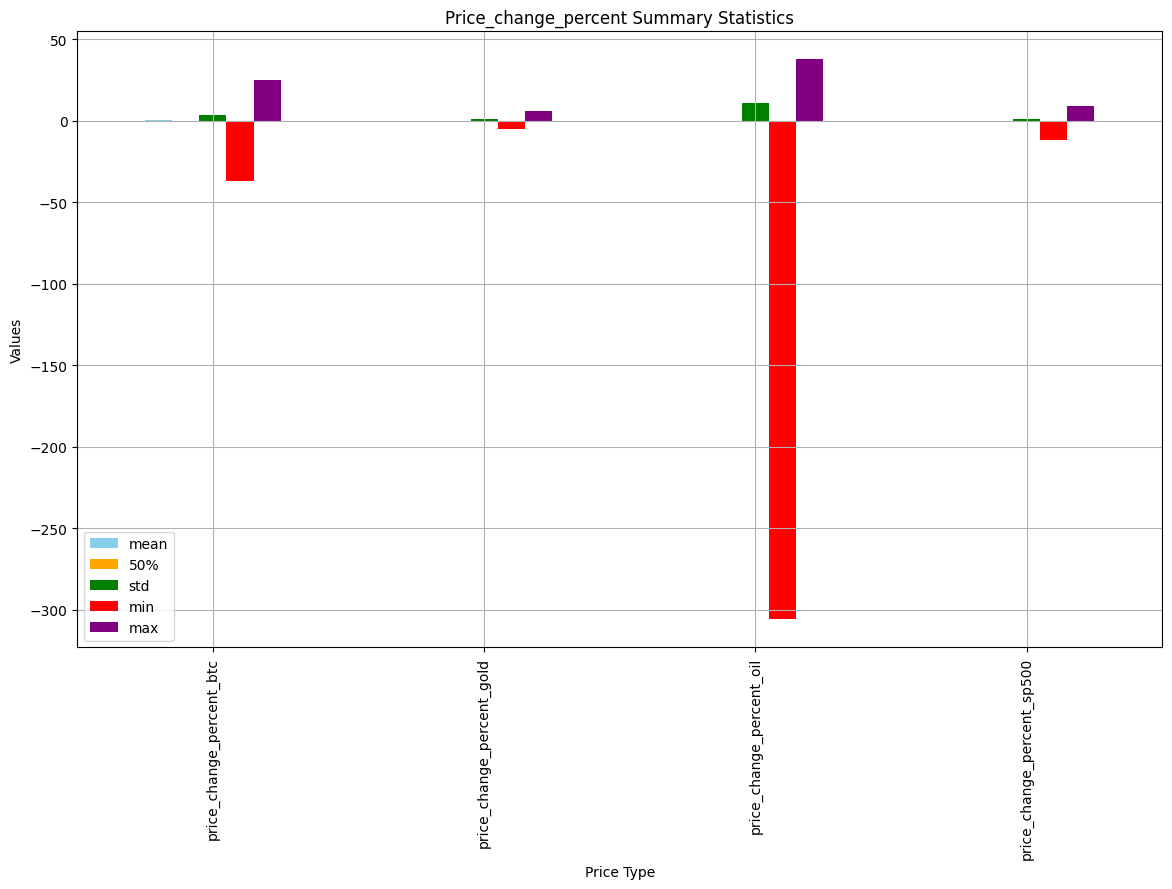

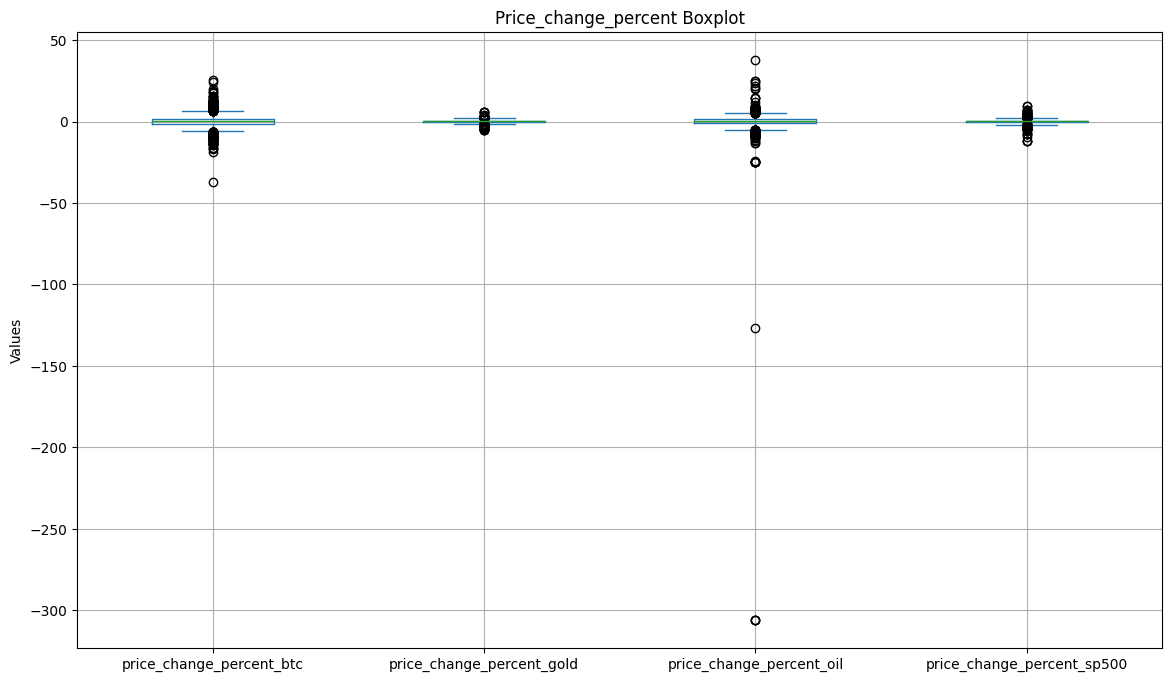

In [102]:
# Example usage of the function
plot_summary_statistics(data, asset=None,column='price_change_percent', plot_type='bar')
plot_summary_statistics(data, asset=None,column='price_change_percent', plot_type='box')


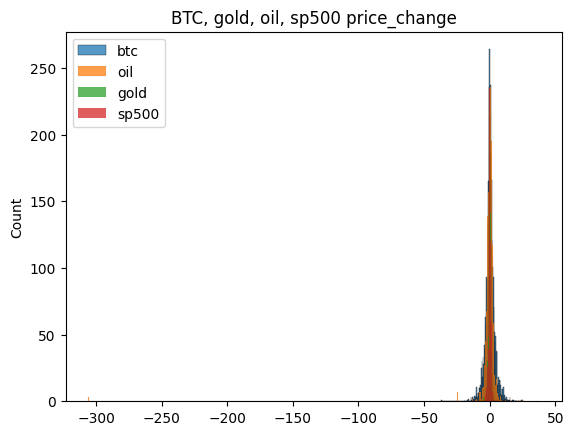

In [117]:
import seaborn as sns
import numpy as np

fig,ax=plt.subplots()

sns.histplot(data.price_change_percent_btc.values,label='btc',ax=ax)
sns.histplot(data.price_change_percent_oil.values,label='oil',ax=ax)
sns.histplot(data.price_change_percent_gold.values,label='gold',ax=ax)
sns.histplot(data.price_change_percent_sp500.values,label='sp500',ax=ax)

#plt.xlim(-50,50)

plt.title('BTC, gold, oil, sp500 price_change')
plt.legend()

# Oil asset seems to have a large negative peak indicated by the negative volatily and percent of price change 

# Plot the timeseries of BTC, Gold, Oil, S&P500 

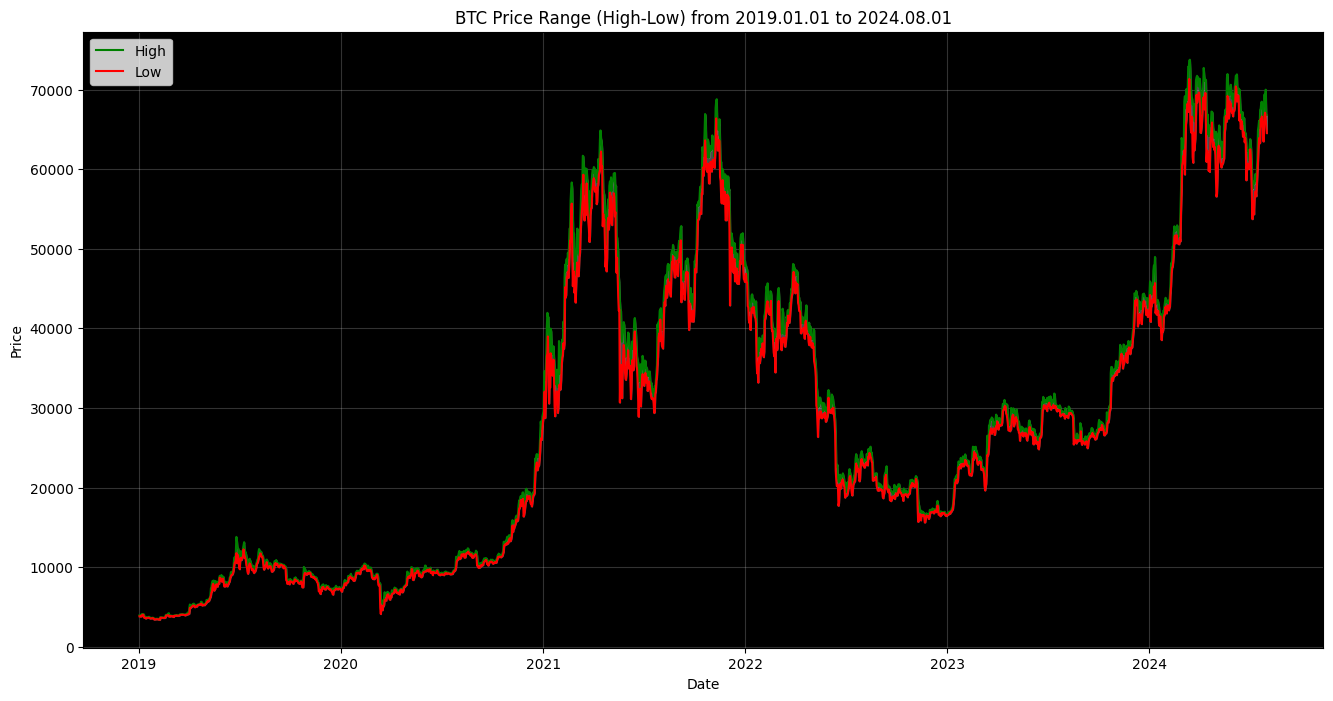

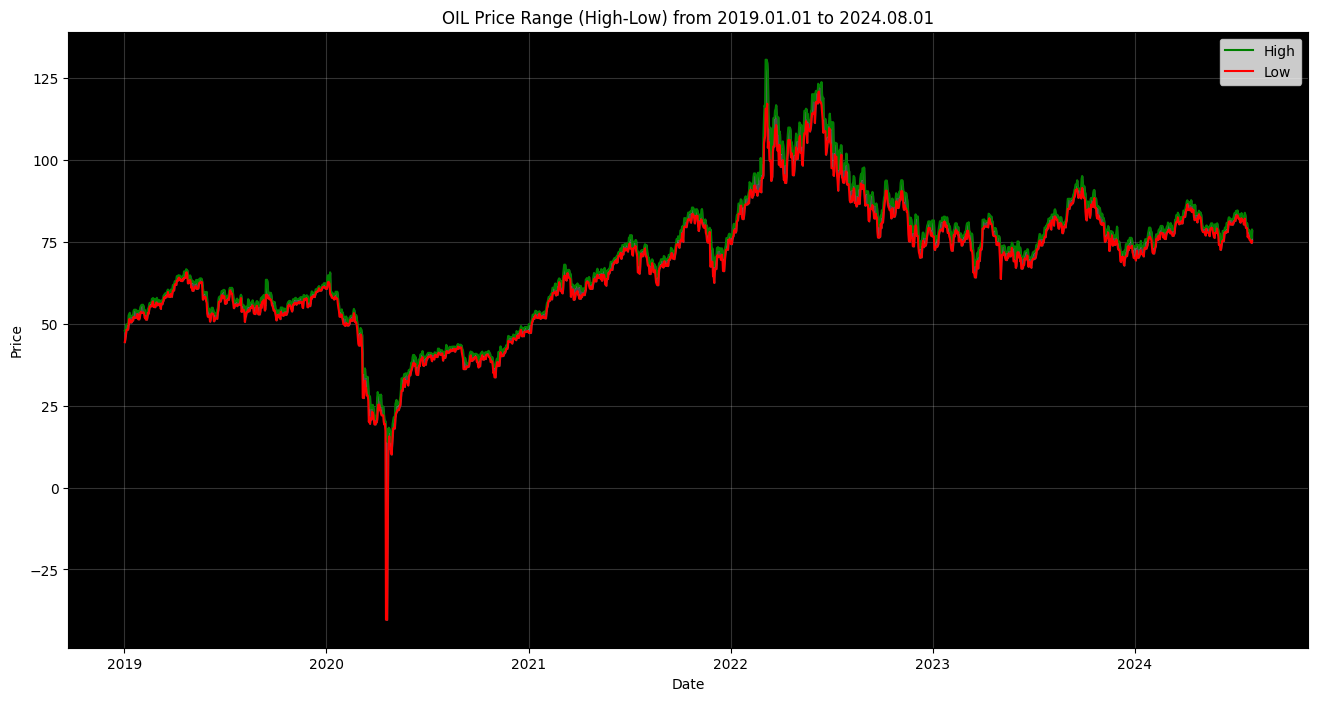

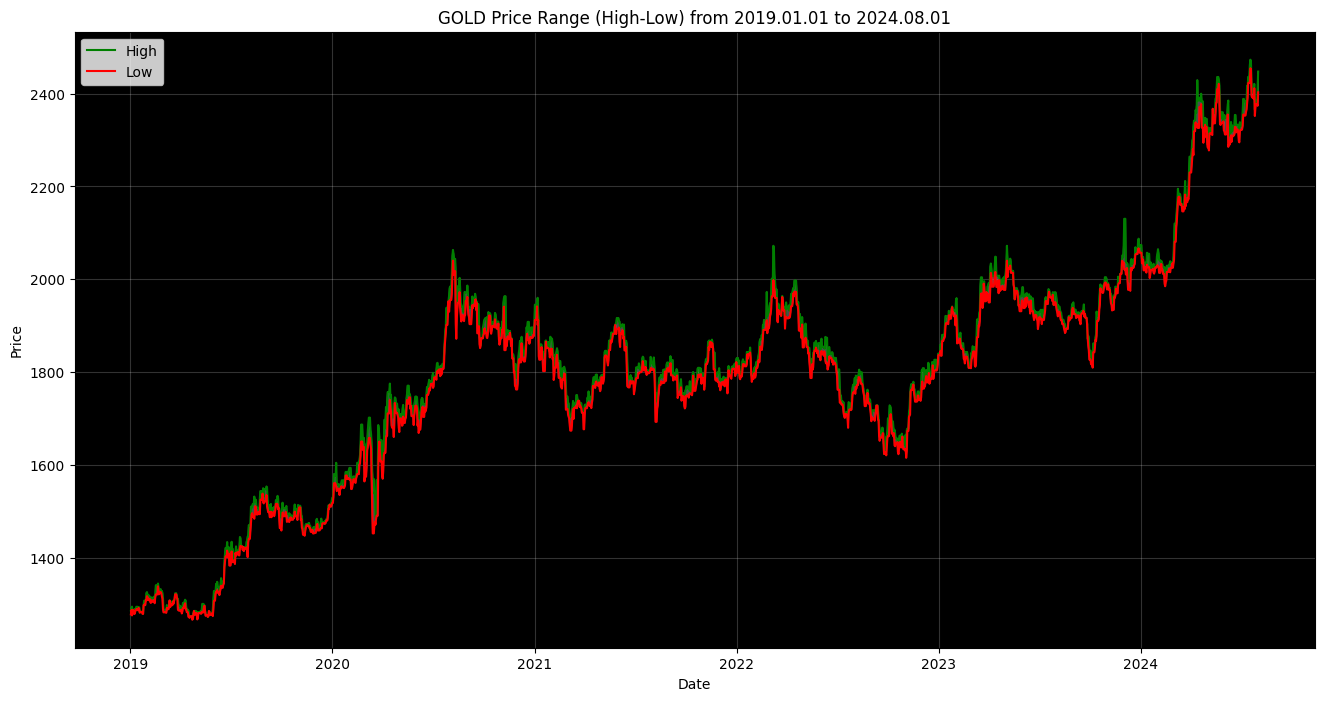

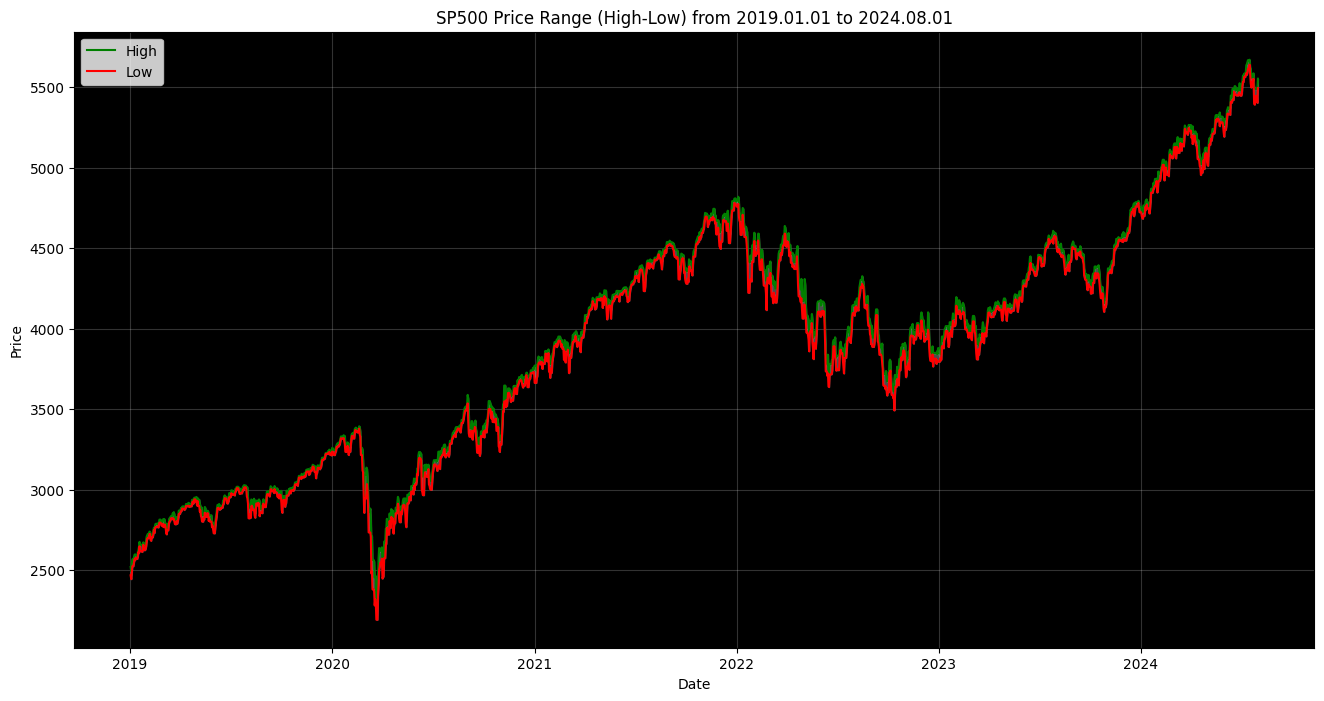

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_price_range(data, start, end, asset_name):
    """
    Plots the price range (High-Low) for a specified asset within a given date range.
    
    Parameters:
        data (pd.DataFrame): The dataset containing the price data.
        start (str): The start date in 'YYYY.MM.DD' format.
        end (str): The end date in 'YYYY.MM.DD' format.
        asset_name (str): The name of the asset, e.g., 'gold', 'btc'.
    """
    # Convert the start and end strings to datetime objects
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    data.loc[:,'Date'] = pd.to_datetime(data.loc[:,'Date'].values)
    
    # Filter the data using the extracted dates
    data_tmp = data[(data['Date'] > start_date) & (data['Date'] < end_date)]
    
    # Extract relevant columns for plotting
    dates = data_tmp['Date']
    open_prices = data_tmp['Open_' + asset_name]
    high_prices = data_tmp['High_' + asset_name]
    low_prices = data_tmp['Low_' + asset_name]
    
    # Plotting
    plt.figure(figsize=(16, 8))
    plt.gca().set_facecolor('black')
    
    plt.plot(dates, high_prices, label='High', color='green')
    plt.plot(dates, low_prices, label='Low', color='red')
    
    plt.fill_between(dates, low_prices, high_prices,
                     where=(high_prices > low_prices),
                     alpha=0.3, color='white')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{asset_name.upper()} Price Range (High-Low) from {start} to {end}')
    plt.legend()
    
    plt.grid(color='white', alpha=0.2)
    plt.show()

# Example usage:
for asset in ['btc','oil','gold','sp500']:
    plot_price_range(data, '2019.01.01', '2024.08.01', asset)
    plt.show()


# Beginning of 2020 shows clear downward trend in all assets. Covid pandemic -> Oil asset showed strongest dip. 

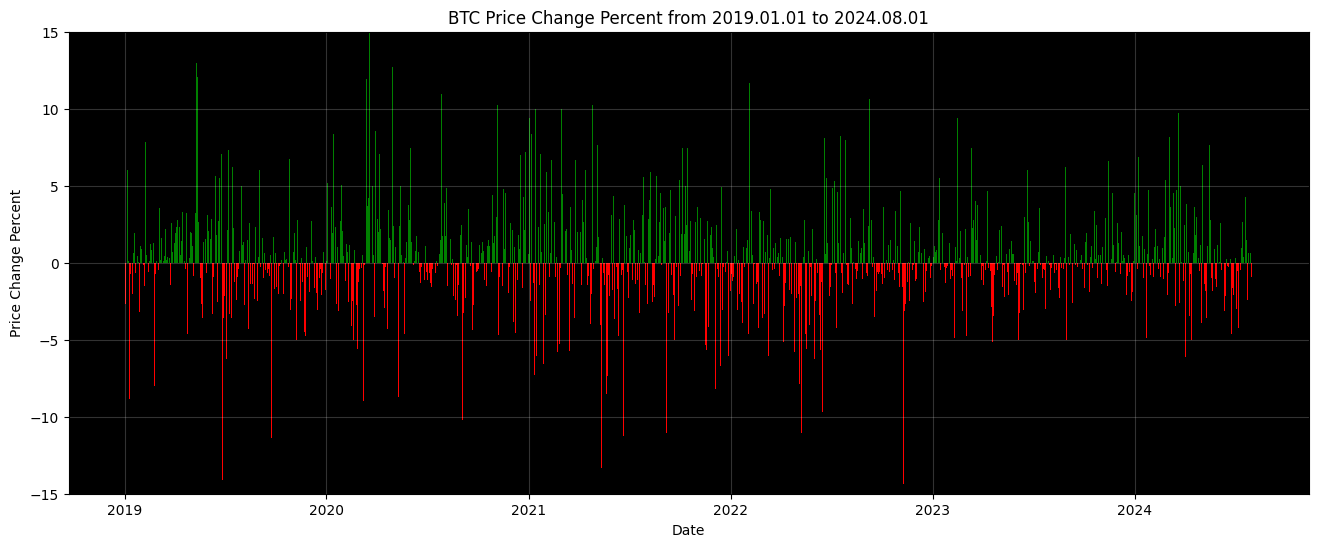

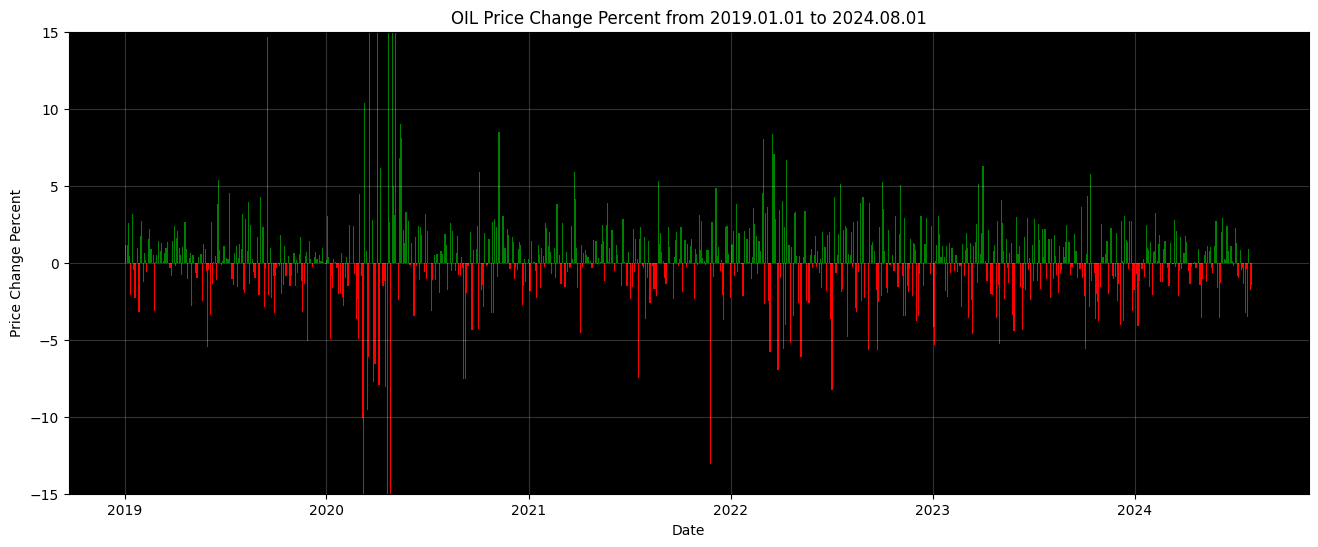

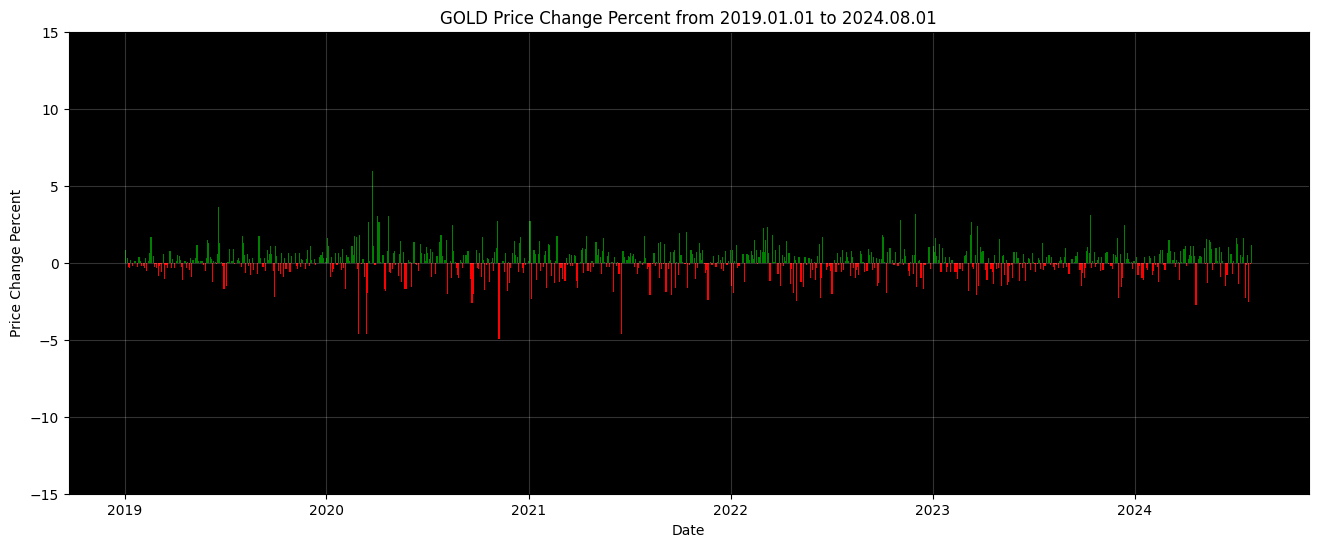

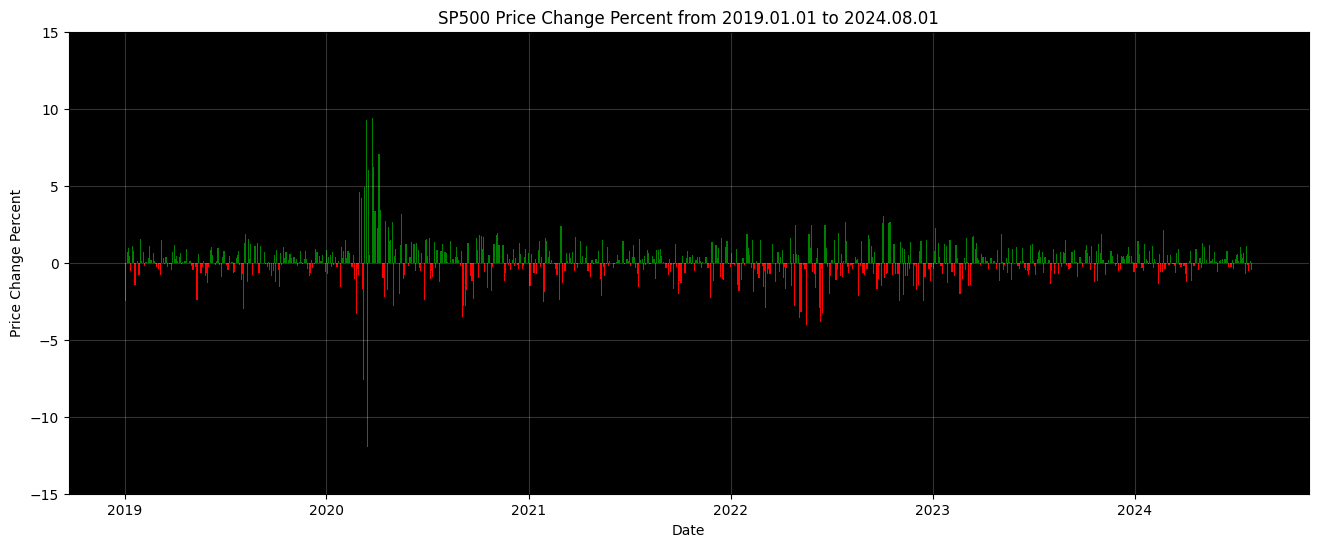

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_price_change_percent(data, start, end, asset_name):
    
    """
    Plots the price change percentage for a specified asset within a given date range.
    
    Parameters:
        data (pd.DataFrame): The dataset containing the price data.
        start (str): The start date in 'YYYY.MM.DD' format.
        end (str): The end date in 'YYYY.MM.DD' format.
        asset_name (str): The name of the asset, e.g., 'gold', 'btc'.
    """
    
    # Convert the start and end strings to datetime objects
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    data.loc[:,'Date'] = pd.to_datetime(data.loc[:,'Date'].values)
    
    # Filter the data using the extracted dates
    data_tmp = data[(data['Date'] > start_date) & (data['Date'] < end_date)]
    
    # Extract the relevant column for plotting
    price_change_percent = data_tmp['price_change_percent_' + asset_name]
    
    # Plotting
    plt.figure(figsize=(16, 6))
    plt.gca().set_facecolor('black')
    
    # Color the bars green for positive and red for negative price changes
    bars = plt.bar(data_tmp['Date'], price_change_percent, 
                   color=['g' if p >= 0 else 'r' for p in price_change_percent])
    
    # Set y-axis limits
    plt.ylim(-15, 15) 
    plt.xlabel('Date')
    plt.ylabel('Price Change Percent')
    plt.title(f'{asset_name.upper()} Price Change Percent from {start} to {end}')
    
    plt.grid(color='white', alpha=0.2)
    
    plt.show()


for asset in ['btc','oil','gold','sp500']:
    plot_price_change_percent(data, '2019.01.01', '2024.08.01', asset)
    plt.show()

# Close/ Open price developement seems to have no clear seasonality, trend etc. 
#    -> confirm and see if there is sort of a temporal relationship

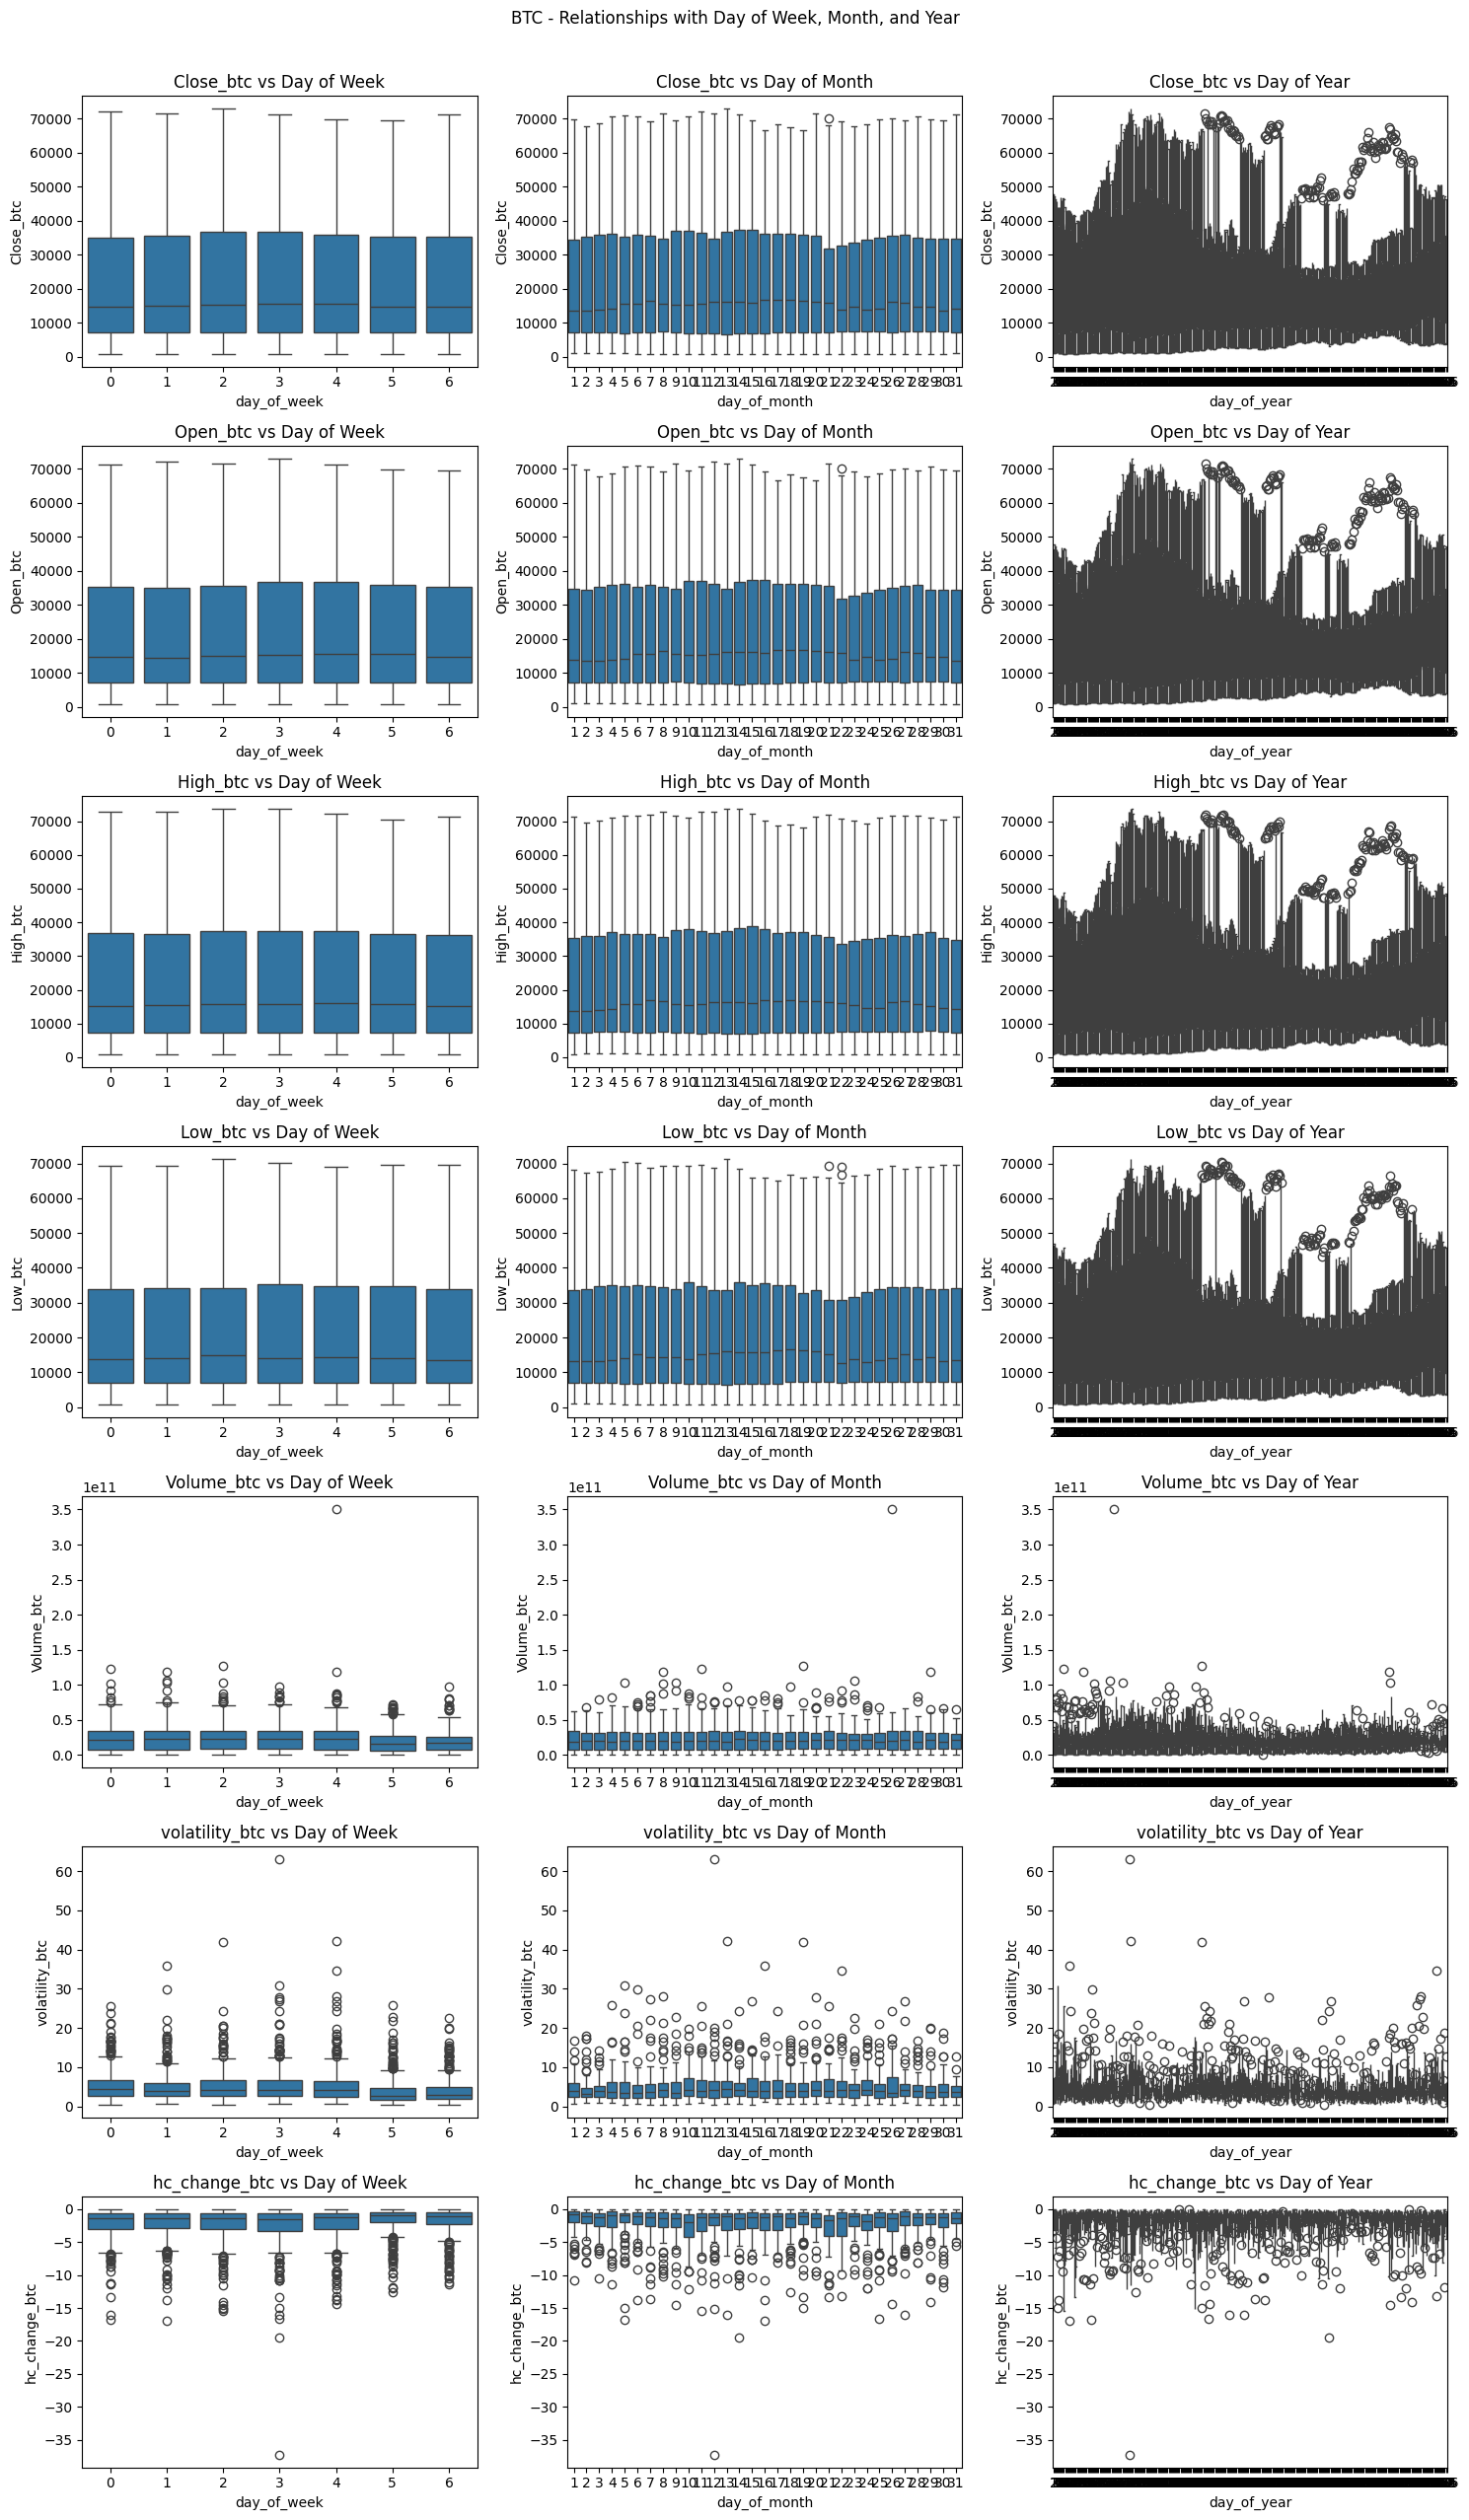

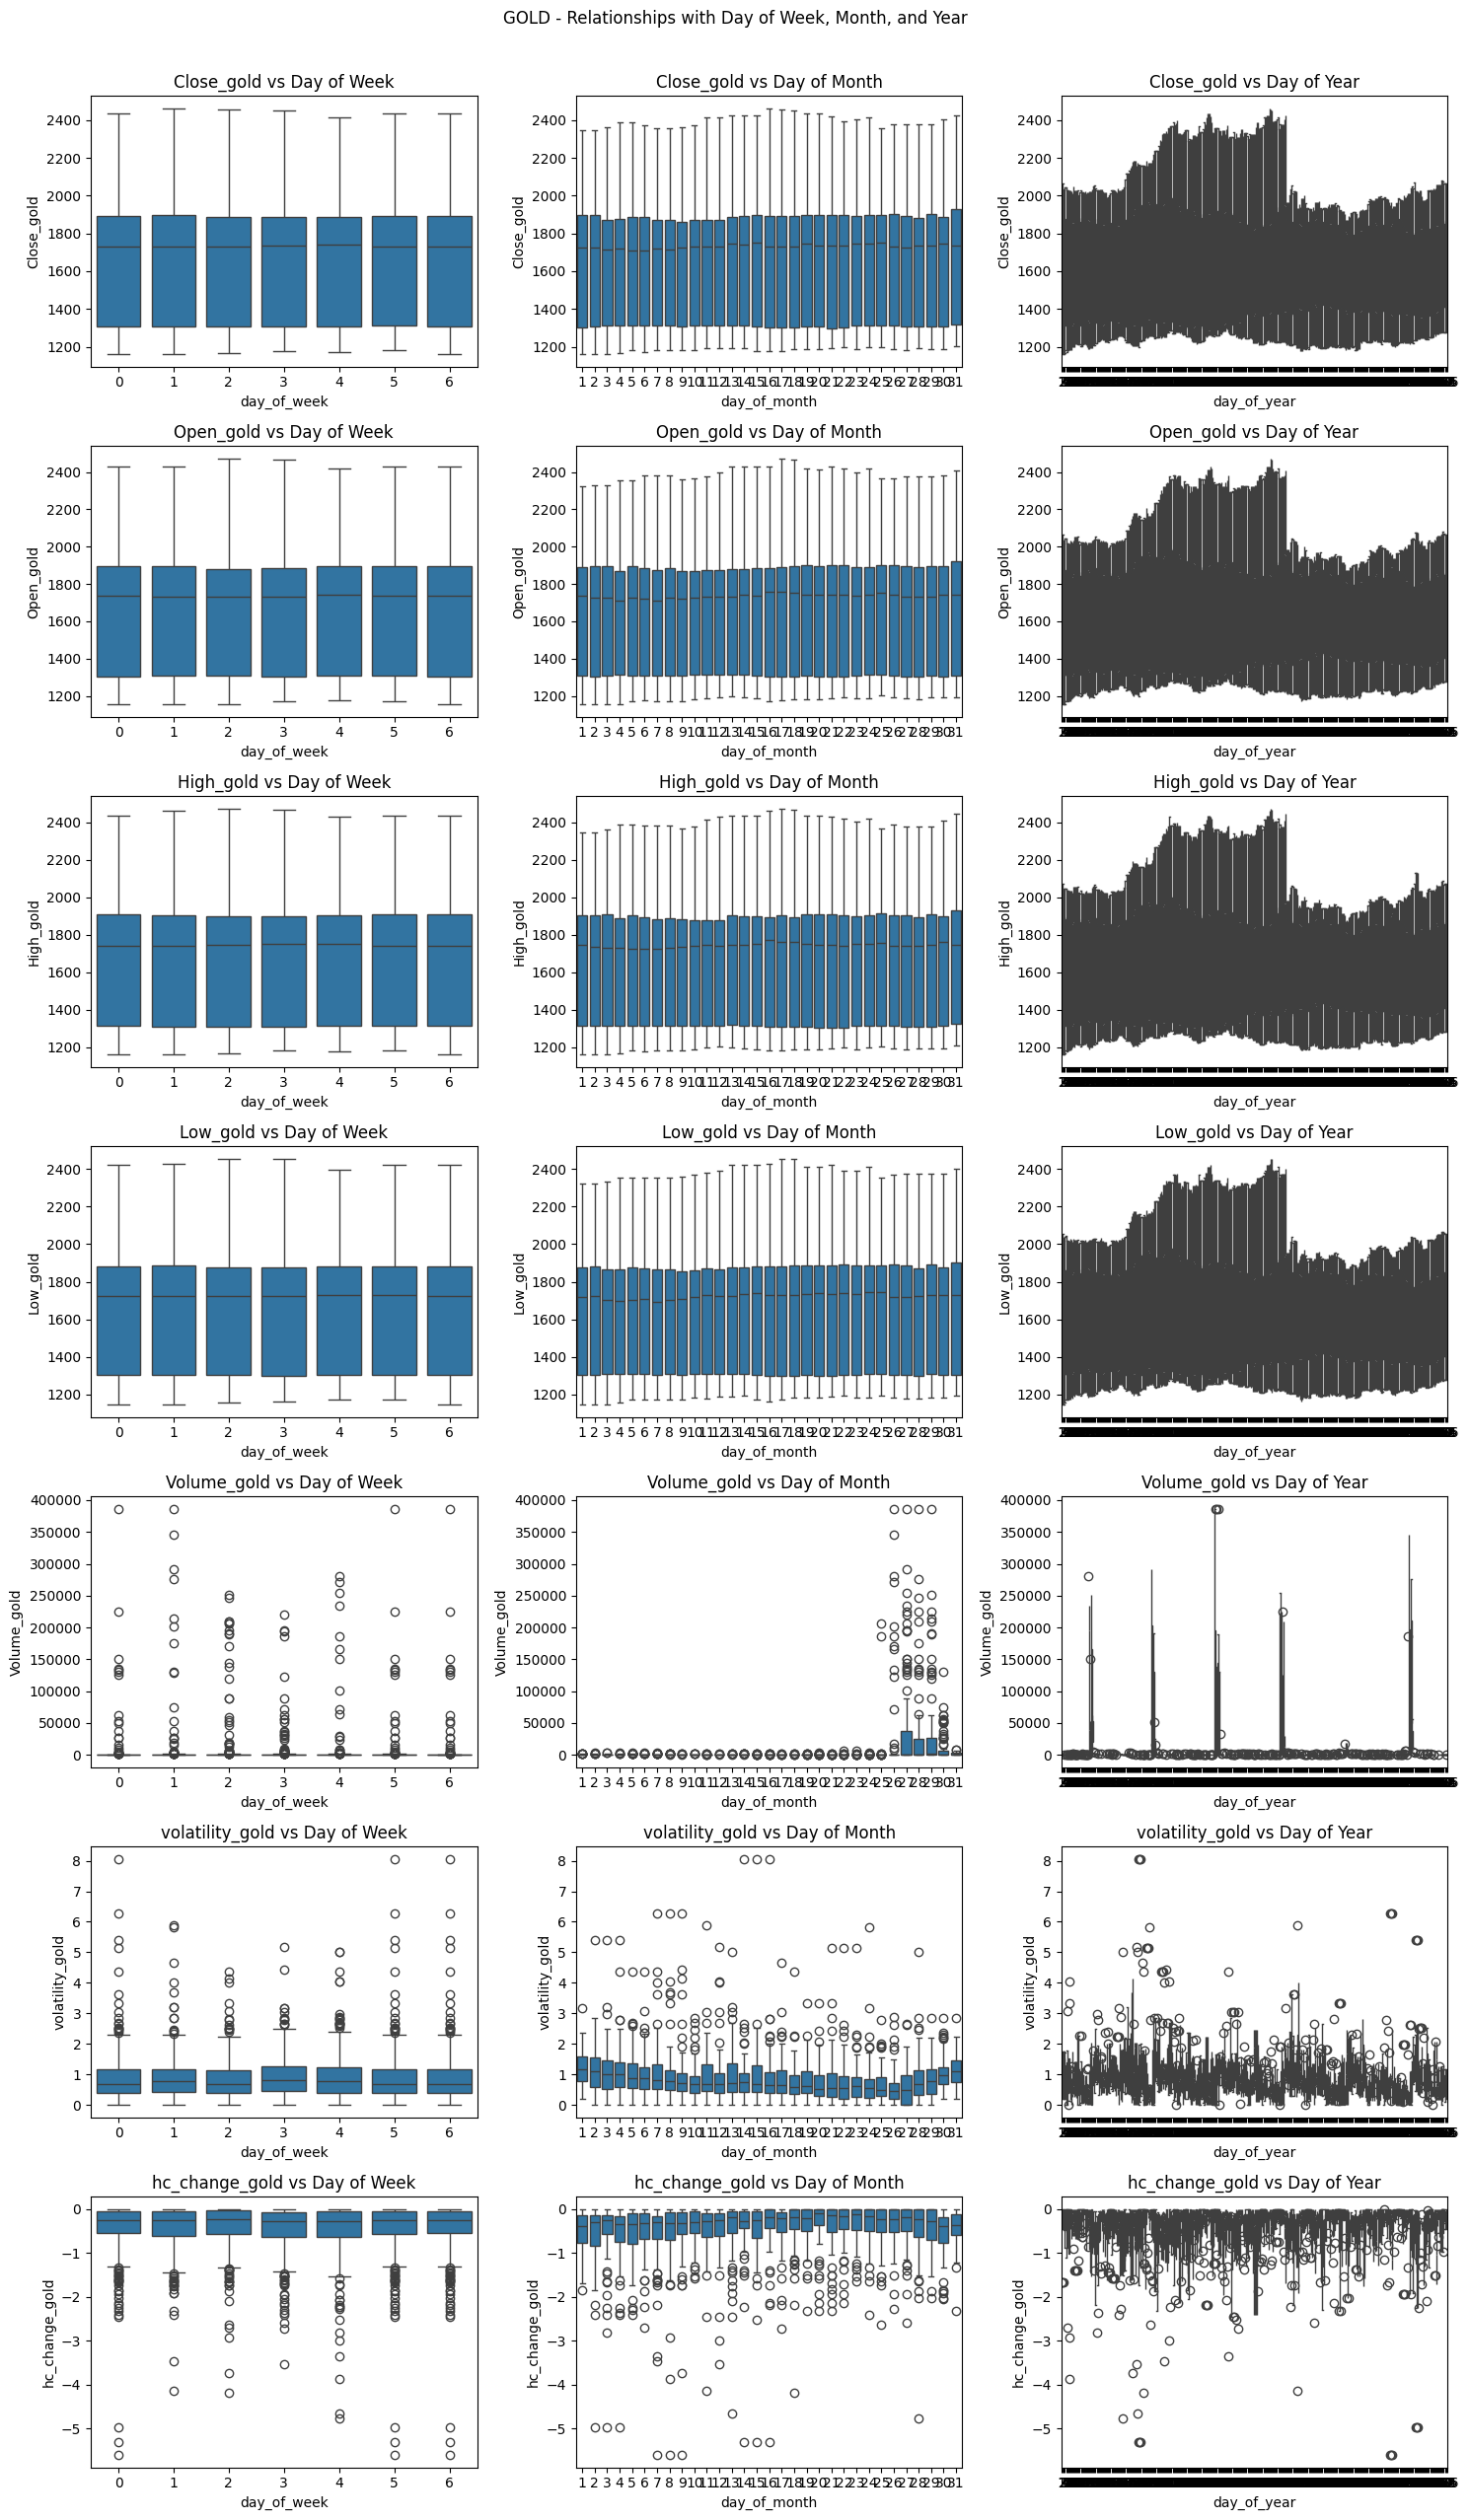

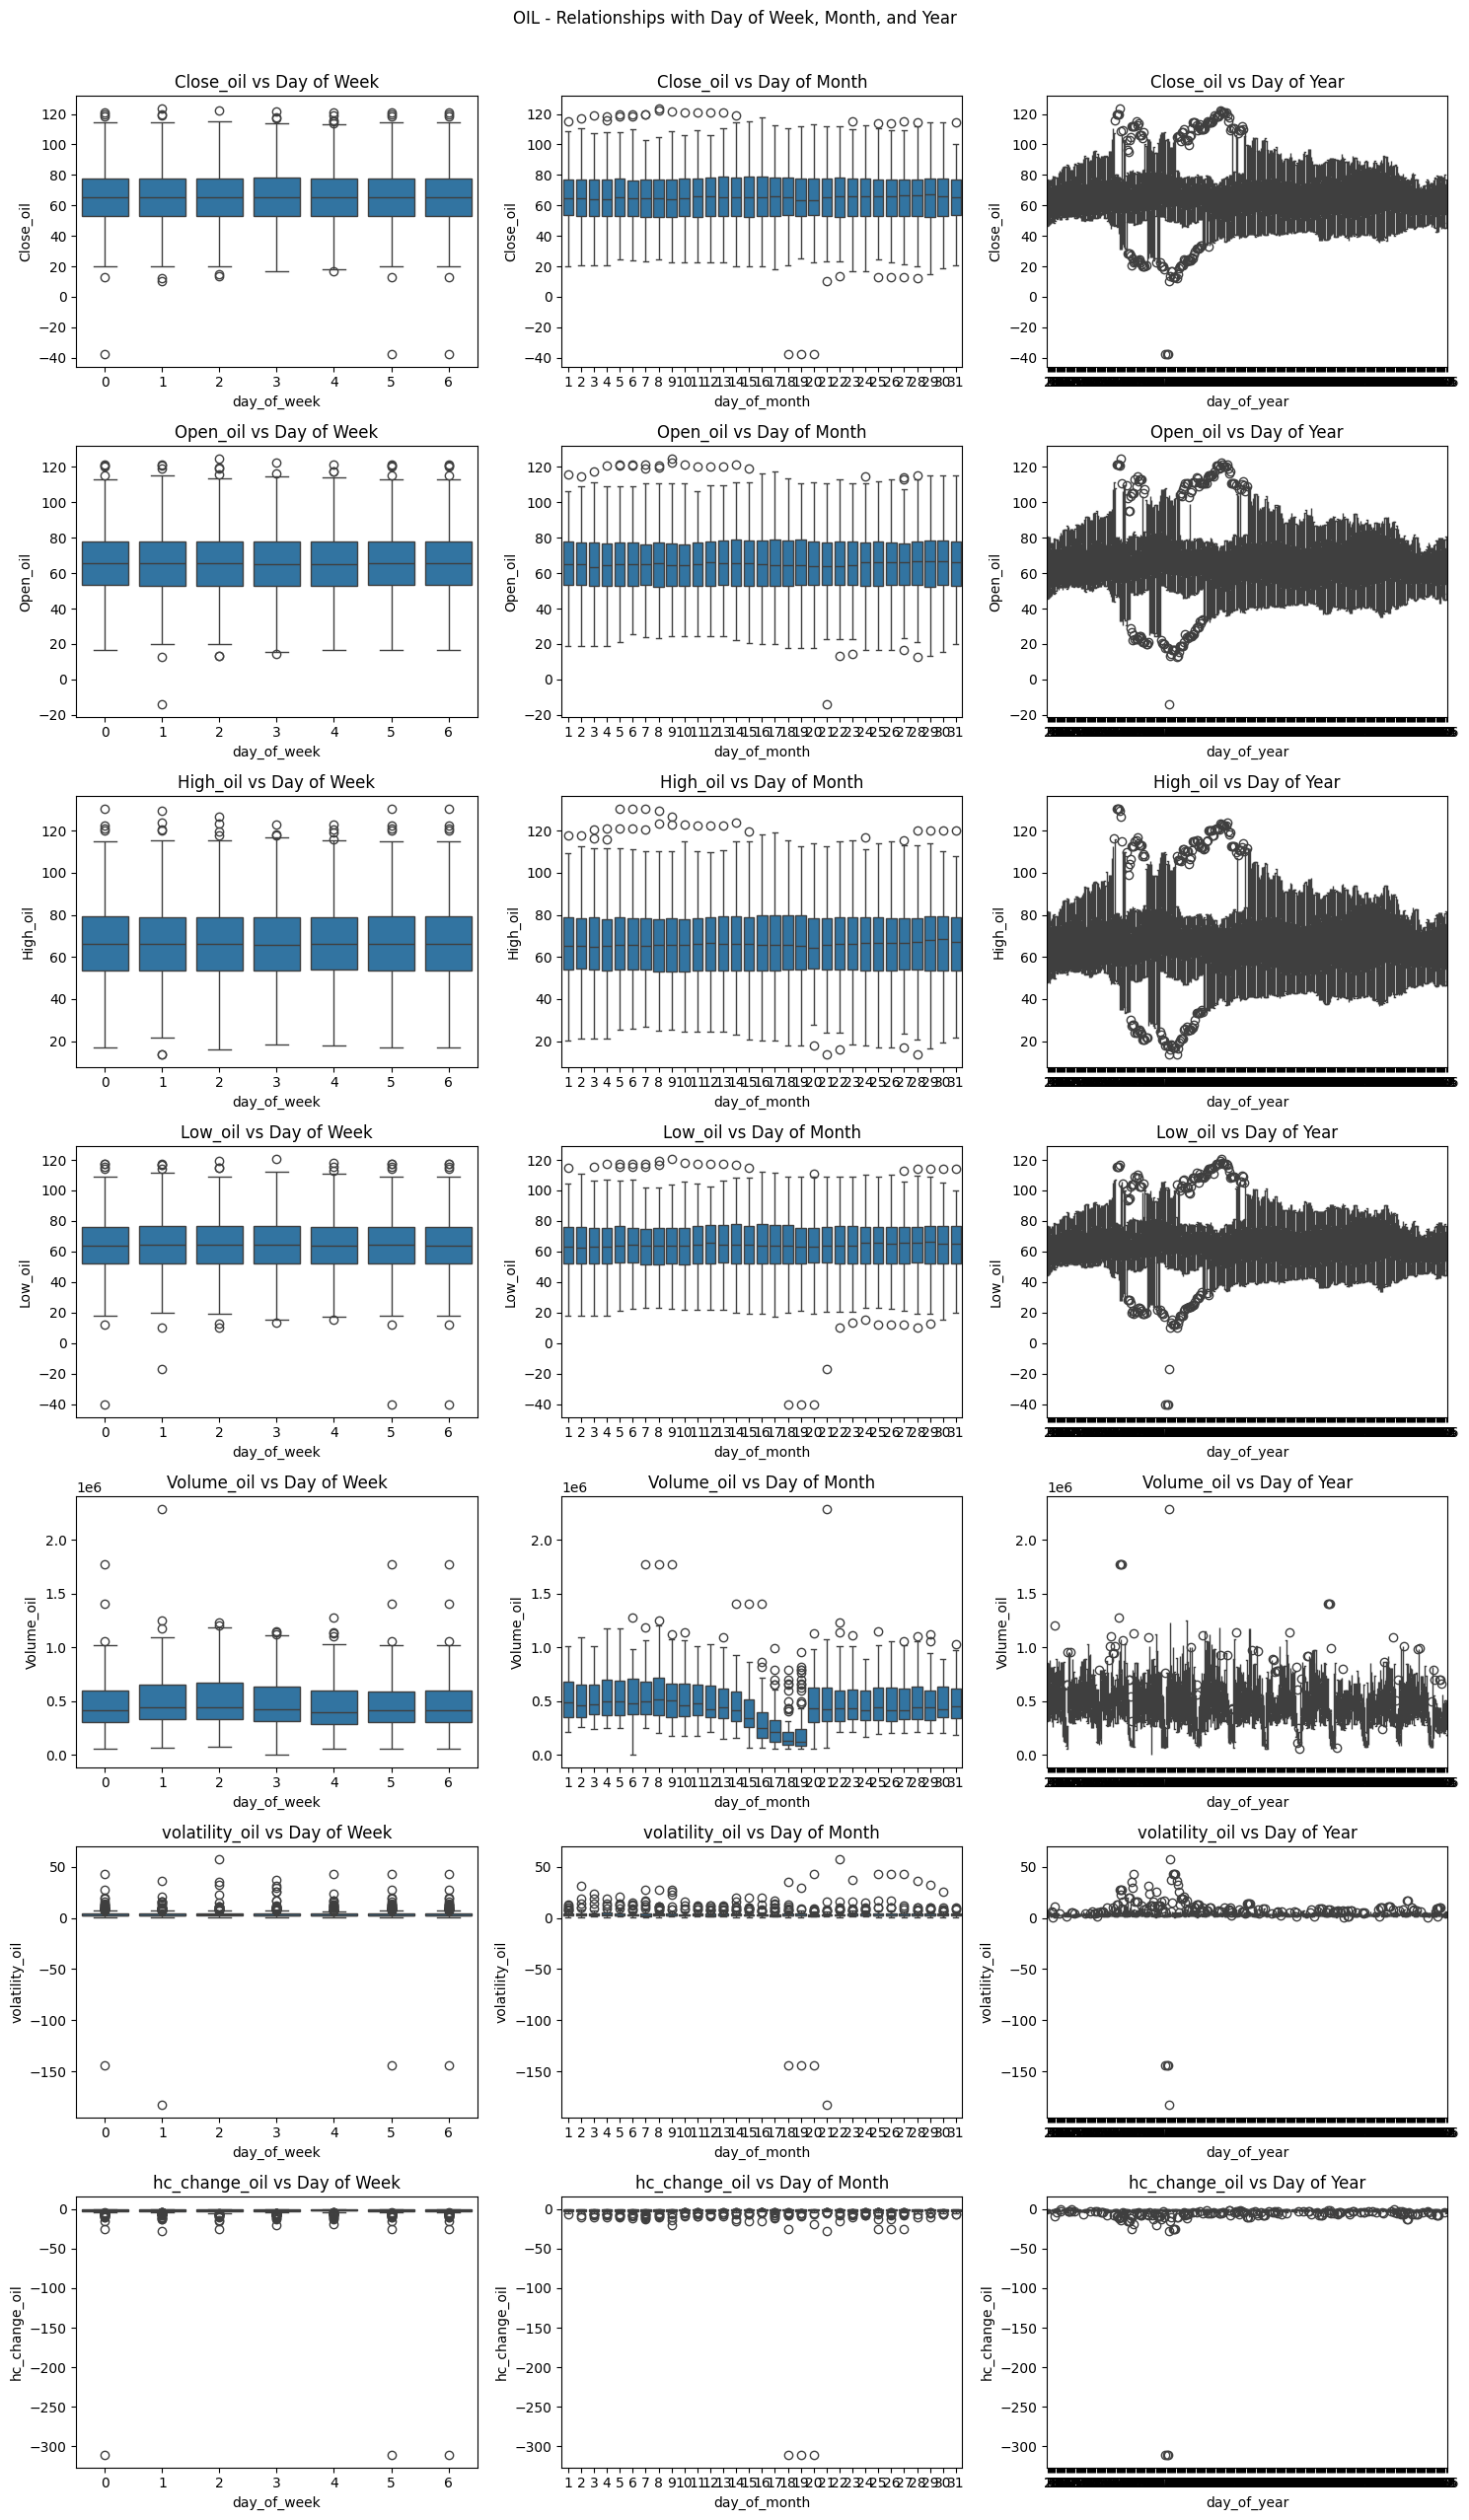

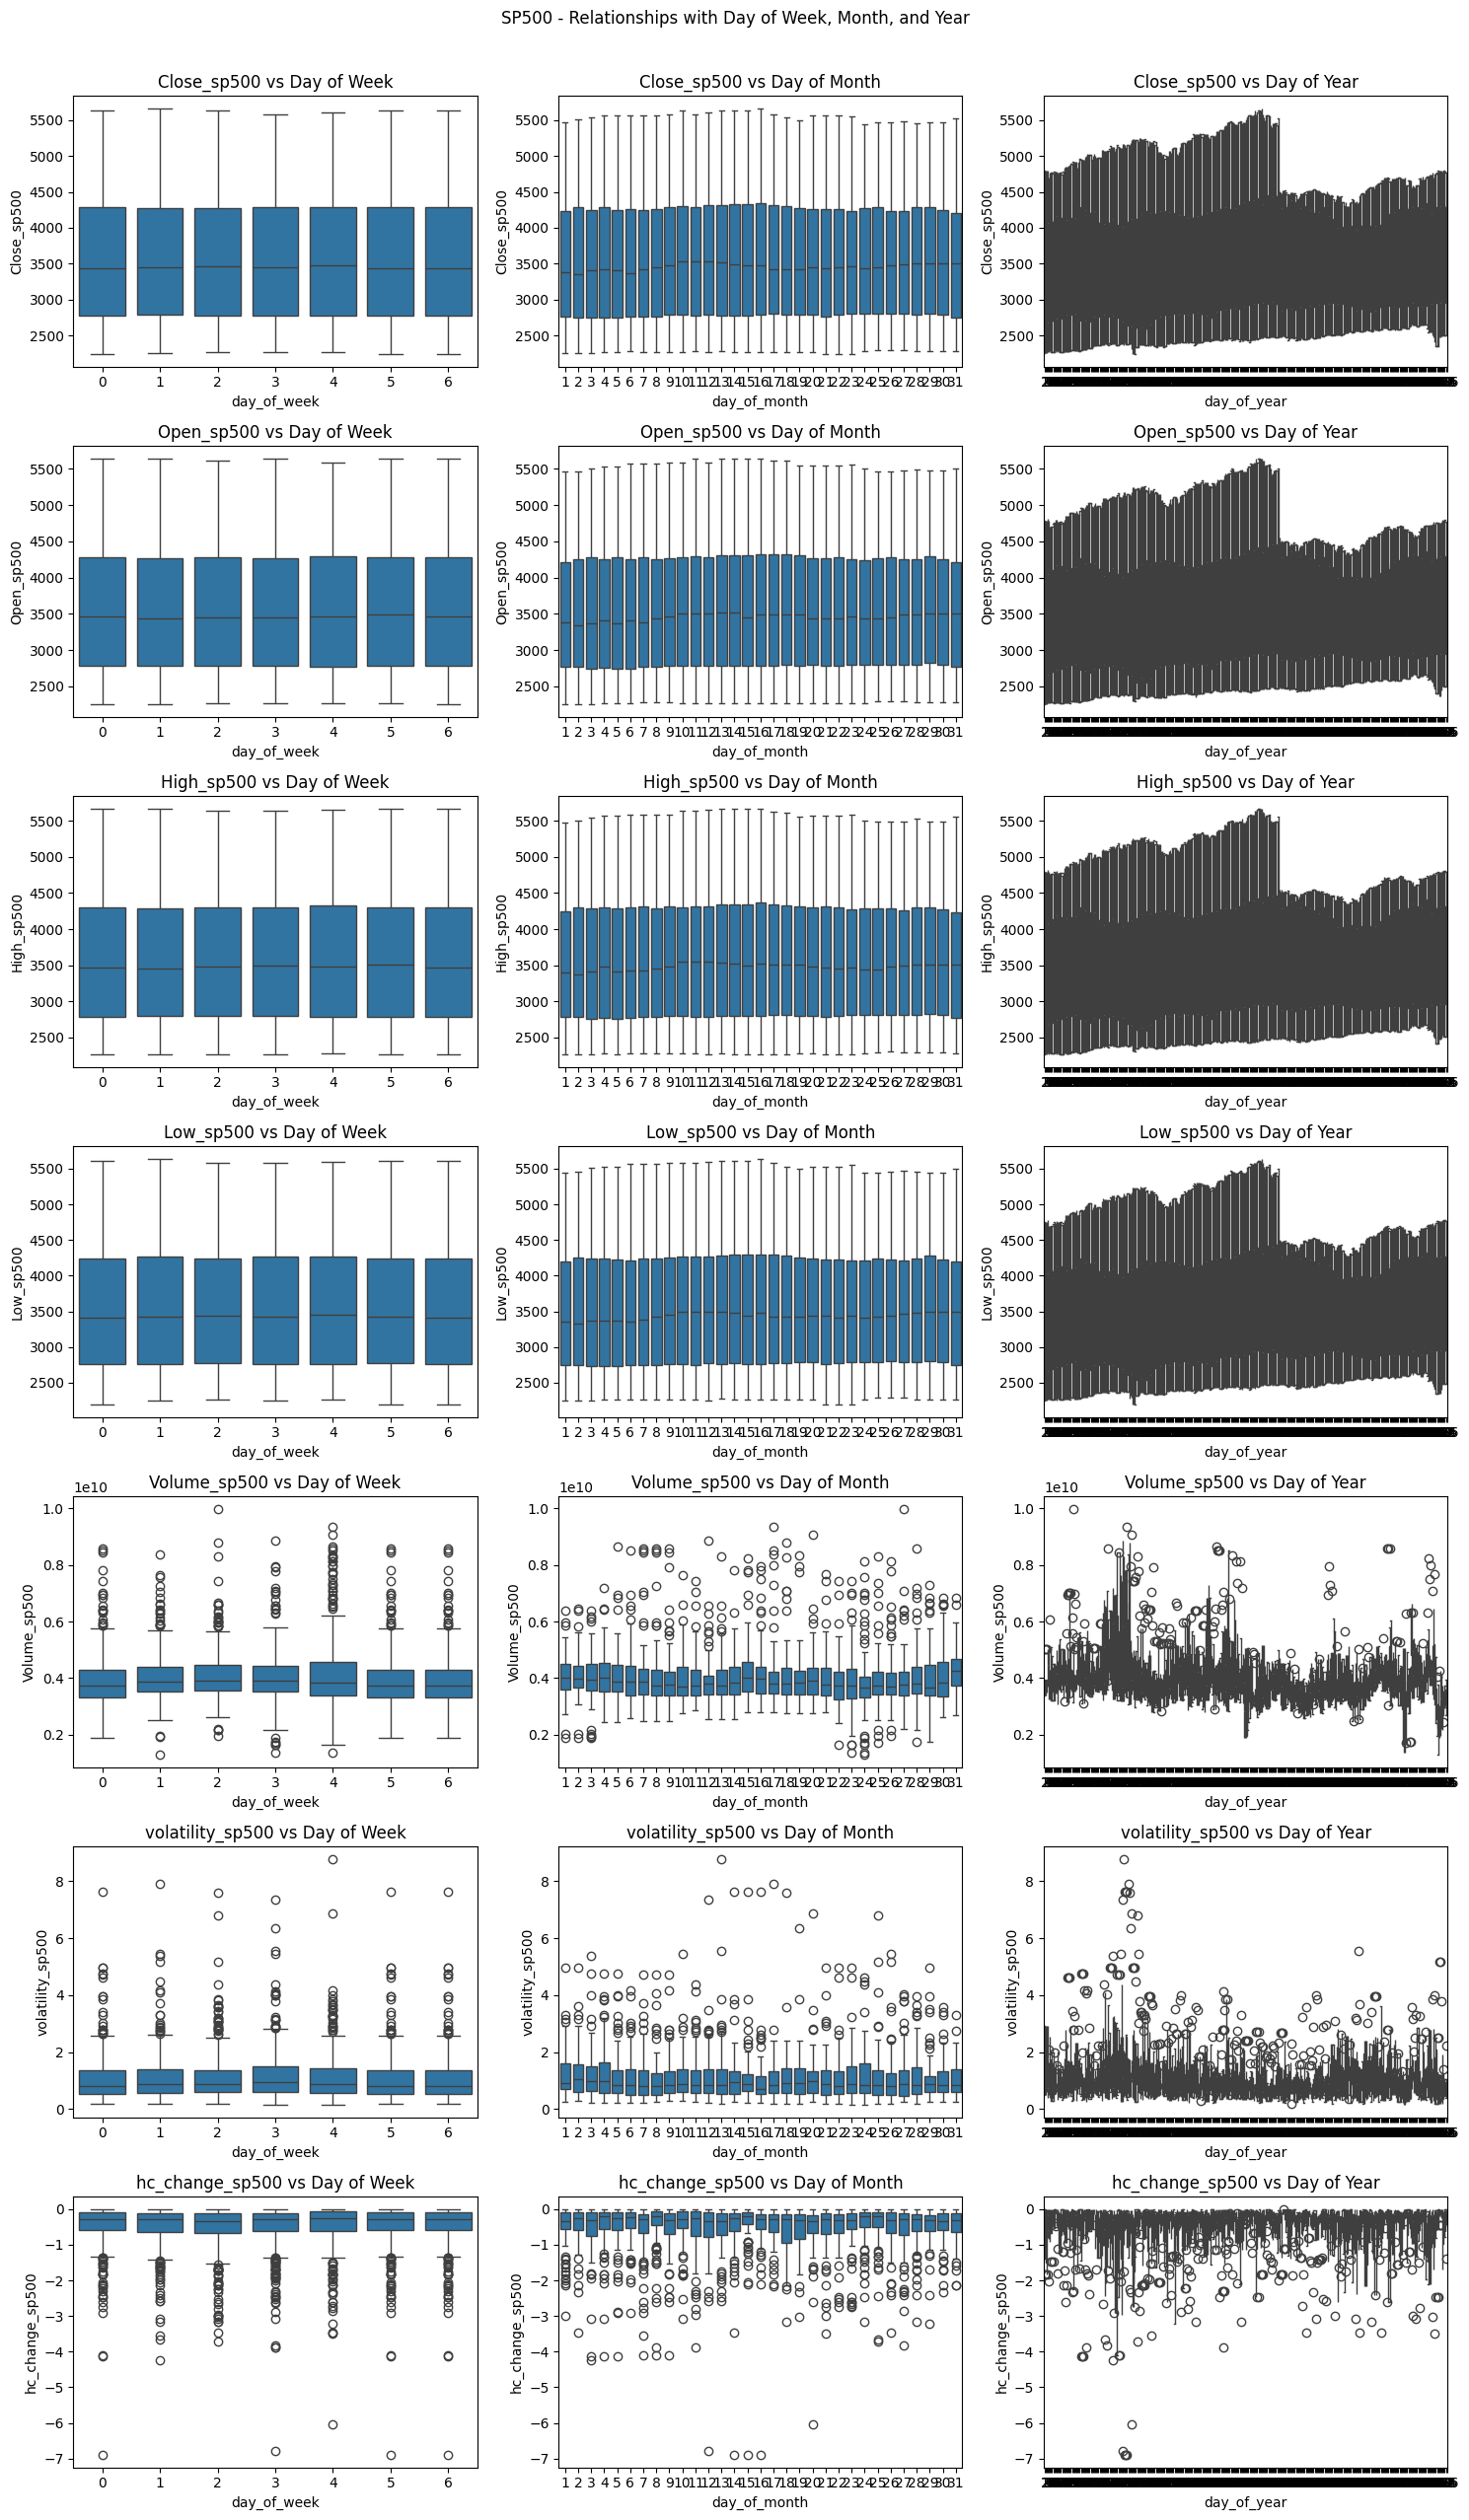

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add 'day_of_week', 'day_of_month', and 'day_of_year' columns to the data
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_week'] = data['Date'].dt.dayofweek
data['day_of_month'] = data['Date'].dt.day
data['day_of_year'] = data['Date'].dt.dayofyear

# Define the columns of interest for each asset
assets_columns = {
    'btc': ['Close_btc', 'Open_btc', 'High_btc', 'Low_btc', 'Volume_btc', 'volatility_btc', 'hc_change_btc'],
    'gold': ['Close_gold', 'Open_gold', 'High_gold', 'Low_gold', 'Volume_gold', 'volatility_gold', 'hc_change_gold'],
    'oil': ['Close_oil', 'Open_oil', 'High_oil', 'Low_oil', 'Volume_oil', 'volatility_oil', 'hc_change_oil'],
    'sp500': ['Close_sp500', 'Open_sp500', 'High_sp500', 'Low_sp500', 'Volume_sp500', 'volatility_sp500', 'hc_change_sp500'],
}

# Function to plot relationships with day of week, day of month, and day of year
def plot_relationships(asset_name, columns):
    plt.figure(figsize=(15, 25))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 3, 3 * i + 1)
        sns.boxplot(x='day_of_week', y=col, data=data)
        plt.title(f'{col} vs Day of Week')

        plt.subplot(len(columns), 3, 3 * i + 2)
        sns.boxplot(x='day_of_month', y=col, data=data)
        plt.title(f'{col} vs Day of Month')

        plt.subplot(len(columns), 3, 3 * i + 3)
        sns.boxplot(x='day_of_year', y=col, data=data)
        plt.title(f'{col} vs Day of Year')
        
    plt.tight_layout()
    plt.suptitle(f'{asset_name.upper()} - Relationships with Day of Week, Month, and Year', y=1.02)
    plt.show()

# Plot the relationships for each asset
for asset, columns in assets_columns.items():
    plot_relationships(asset, columns)


# Gold Volume and Oil Volume seem to have some temporal dependencies, respectively. 

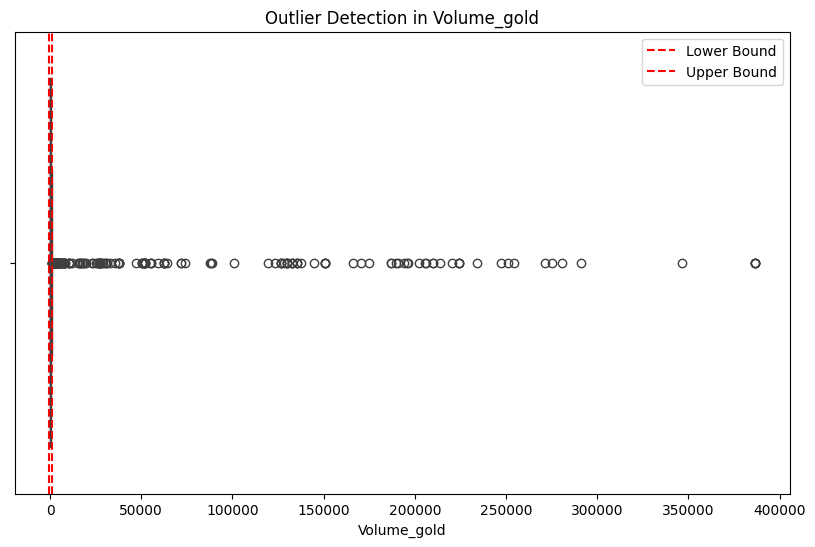

278

In [126]:
import numpy as np

# Using IQR method for outlier detection in 'Volume_gold'
Q1 = data['Volume_gold'].quantile(0.25)
Q3 = data['Volume_gold'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Volume_gold'] < lower_bound) | (data['Volume_gold'] > upper_bound)]

# Visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Volume_gold'])
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Outlier Detection in Volume_gold')
plt.legend()
plt.show()

outliers_count = outliers.shape[0]
outliers_count


In [127]:
# Extract the relevant information for outliers above the upper bound
high_volume_outliers = outliers[outliers['Volume_gold'] > upper_bound][['Date', 'day_of_week', 'day_of_month', 'day_of_year', 'Volume_gold']]

# Count the occurrences for day of the week, day of month, and day of year
day_of_week_counts = high_volume_outliers['day_of_week'].value_counts()
day_of_month_counts = high_volume_outliers['day_of_month'].value_counts()
day_of_year_counts = high_volume_outliers['day_of_year'].value_counts()

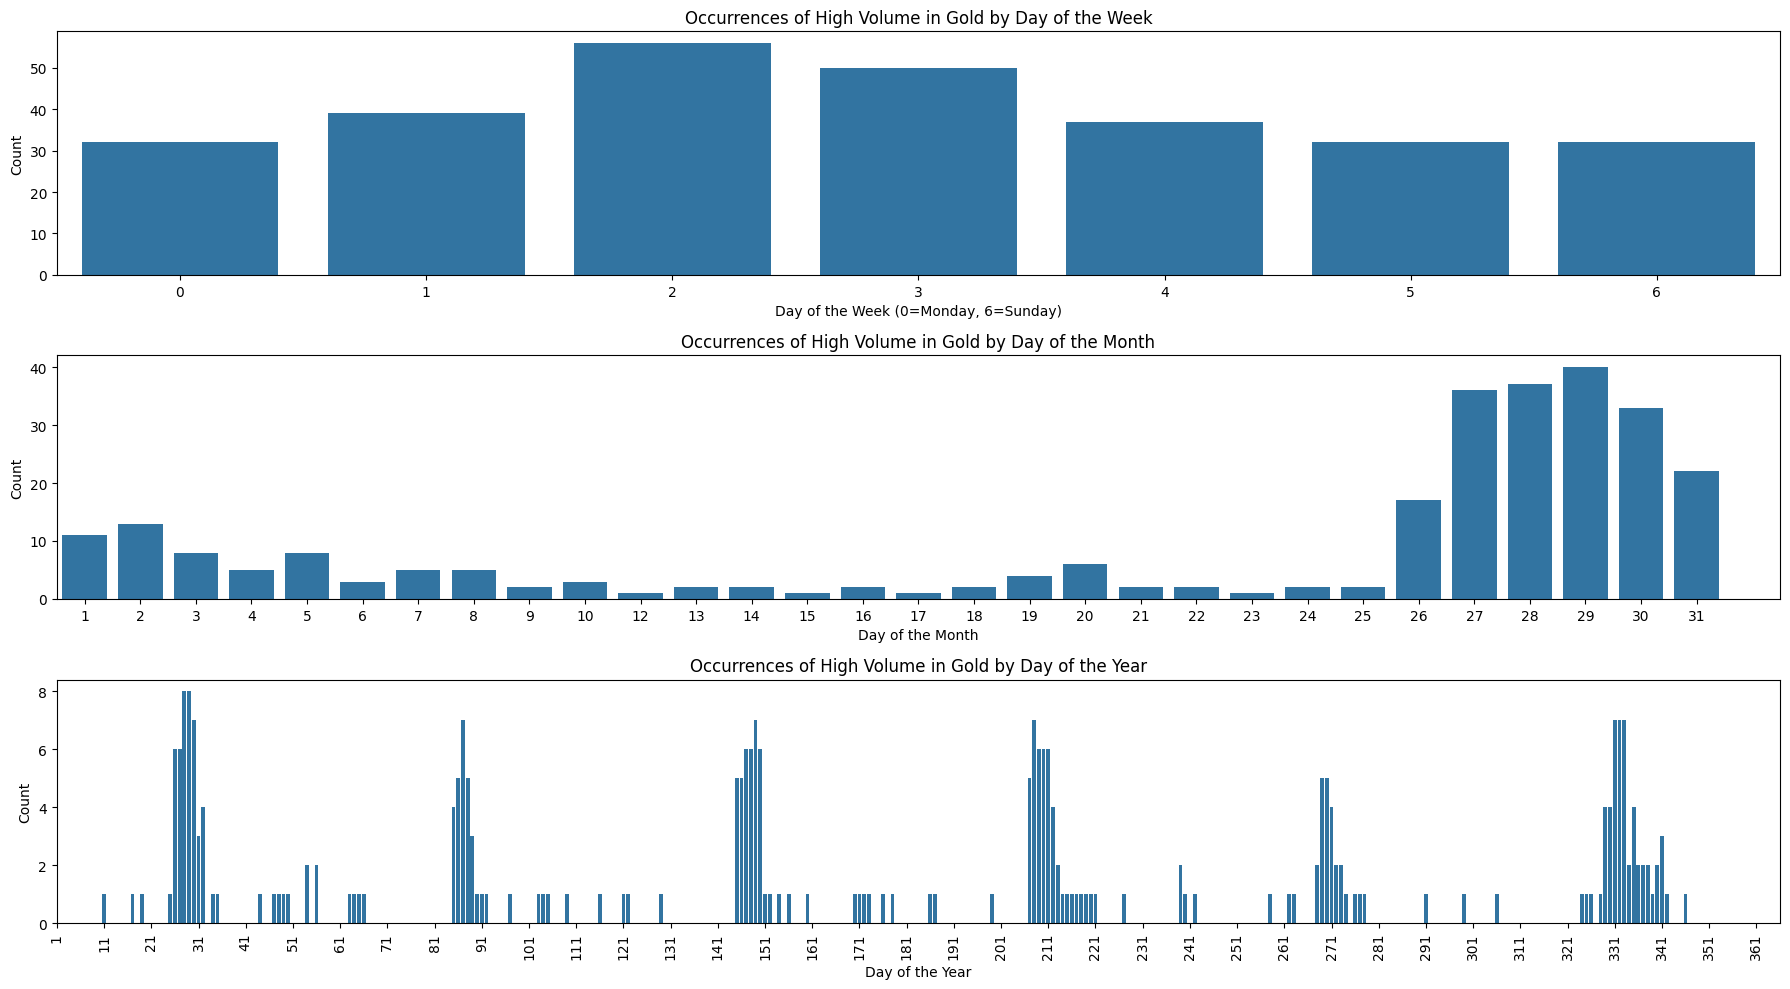

In [128]:
# Remaking the plots with adjusted x-axis limits

plt.figure(figsize=(18, 10))

# Day of the Week
plt.subplot(3, 1, 1)
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Occurrences of High Volume in Gold by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.xlim(-0.5, 6.5)  # x-axis limit for day of the week

# Day of the Month
plt.subplot(3, 1, 2)
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values)
plt.title('Occurrences of High Volume in Gold by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.xlim(-0.5, 30.5)  # x-axis limit for day of the month

# Remaking the third subplot for 'Day of the Year' with correct handling of zero counts

# Create a full range for days of the year (1 to 366)
full_day_of_year_range = pd.Series(range(1, 367))

# Merge with the actual counts to fill in missing days with zero counts
day_of_year_counts_full = full_day_of_year_range.to_frame(name='day_of_year').merge(
    day_of_year_counts.to_frame(name='count'),
    left_on='day_of_year',
    right_index=True,
    how='left'
).fillna(0)

# Plot the full day of the year counts

plt.subplot(3, 1, 3)
sns.barplot(x=day_of_year_counts_full['day_of_year'], y=day_of_year_counts_full['count'])
plt.title('Occurrences of High Volume in Gold by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Count')
plt.xlim(1, 366)  # Full span of the x-axis for the day of the year
plt.xticks(ticks=range(1, 367, 10), labels=range(1, 367, 10), rotation=90)
plt.tight_layout()
plt.show()


# Gold Volume is highest around every 2 month and during the end of the respective month 
## check if staticitcs of asset during high-volume period is different than low-volume periods

In [129]:
high_volume_days= day_of_year_counts_full[day_of_year_counts_full>2].index

high_volume_data=data.loc[data.day_of_year.isin(high_volume_days)]
low_volume_data=data.loc[~data.day_of_year.isin(high_volume_days)]

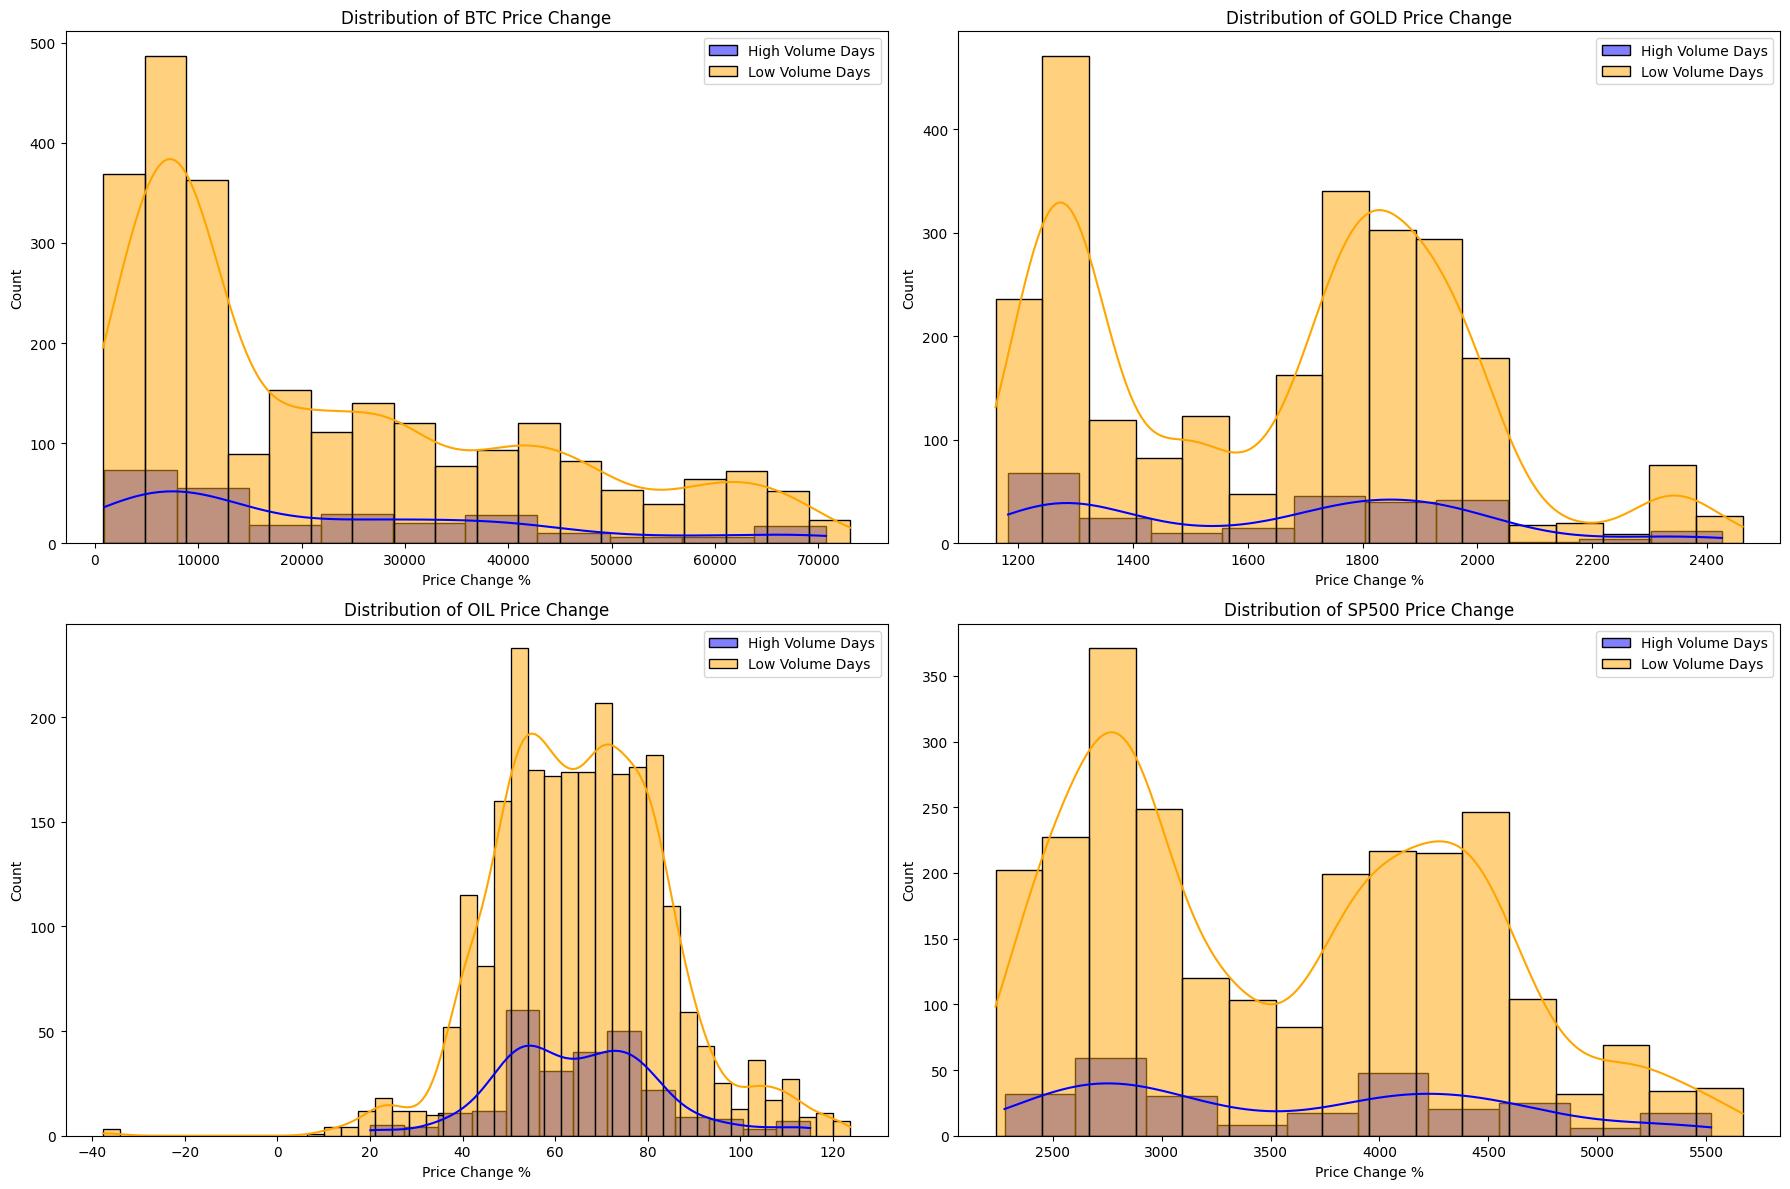

In [131]:
# Create datasets for high volume days and low volume days
high_volume_days = day_of_year_counts[day_of_year_counts > 2].index

high_volume_data = data.loc[data['day_of_year'].isin(high_volume_days)]
low_volume_data = data.loc[~data['day_of_year'].isin(high_volume_days)]

# Calculate price change percentage for all assets
assets = ['btc', 'gold', 'oil', 'sp500']
#for asset in assets:
 #   high_volume_data[f'price_change_percent__{asset}'] = (high_volume_data[f'Close_{asset}'] - high_volume_data[f'Open_{asset}']) / high_volume_data[f'Open_{asset}'] * 100
#  low_volume_data[f'price_change_percent_{asset}'] = (low_volume_data[f'Close_{asset}'] - low_volume_data[f'Open_{asset}']) / low_volume_data[f'Open_{asset}'] * 100

# Plotting the distributions for each asset's price change
plt.figure(figsize=(18, 12))

for i, asset in enumerate(assets, 1):
    plt.subplot(2, 2, i)
    sns.histplot(high_volume_data[f'Close_{asset}'], kde=True, color='blue', label='High Volume Days')
    sns.histplot(low_volume_data[f'Close_{asset}'], kde=True, color='orange', label='Low Volume Days')
    plt.title(f'Distribution of {asset.upper()} Price Change')
    plt.xlabel('Price Change %')
    plt.legend()

plt.tight_layout()
plt.show()



In [132]:
# Performing statistical tests to check if the distributions are different
from scipy.stats import ttest_ind,ks_2samp


# Perform the Kolmogorov-Smirnov test to compare distributions
ks_tests = {}
for asset in assets:
    stat, p_value = ks_2samp(
        high_volume_data[f'Close_{asset}'].dropna(),
        low_volume_data[f'Close_{asset}'].dropna()
    )
    ks_tests[asset] = {'ks_stat': stat, 'p_value': p_value}

print(ks_tests)


{'btc': {'ks_stat': np.float64(0.04865156188626046), 'p_value': np.float64(0.6090521172798526)}, 'gold': {'ks_stat': np.float64(0.04574824080361248), 'p_value': np.float64(0.684414866566501)}, 'oil': {'ks_stat': np.float64(0.0587286894405588), 'p_value': np.float64(0.3708657800771857)}, 'sp500': {'ks_stat': np.float64(0.06729554194819391), 'p_value': np.float64(0.22189987190069665)}}


In [130]:
correlation_matrix = high_volume_data[['Close_btc', 'Close_gold', 'Close_oil', 'Close_sp500']].corr()

# Display the correlation matrix
correlation_matrix

,Close_btc,Close_gold,Close_oil,Close_sp500
Close_btc,1.000000,0.827990,0.549249,0.923362
Close_gold,0.827990,1.000000,0.437381,0.918666
Close_oil,0.549249,0.437381,1.000000,0.650679
Close_sp500,0.923362,0.918666,0.650679,1.000000


In [131]:
correlation_matrix = low_volume_data[['Close_btc', 'Close_gold', 'Close_oil', 'Close_sp500']].corr()

# Display the correlation matrix
correlation_matrix

,Close_btc,Close_gold,Close_oil,Close_sp500
Close_btc,1.000000,0.788664,0.529021,0.908114
Close_gold,0.788664,1.000000,0.410075,0.904669
Close_oil,0.529021,0.410075,1.000000,0.626675
Close_sp500,0.908114,0.904669,0.626675,1.000000


In [134]:
from scipy.stats import mannwhitneyu, wilcoxon

# Function to perform the Mann-Whitney U test and check significance from zero
def analyze_distributions(high_volume, low_volume):
    results = {}
    for asset in assets:
        # Mann-Whitney U Test
        u_stat, u_p_value = mannwhitneyu(high_volume[f'price_change_percent_{asset}'], low_volume[f'price_change_percent_{asset}'])
        
        # Wilcoxon test to check if distributions are significantly different from zero
        high_volume_median_test = wilcoxon(high_volume[f'price_change_percent_{asset}'] - 0)
        low_volume_median_test = wilcoxon(low_volume[f'price_change_percent_{asset}'] - 0)
        
        # Determine direction for high volume days
        if high_volume_median_test.pvalue < 0.05:
            high_volume_direction = "positive" if high_volume[f'price_change_percent_{asset}'].median() > 0 else "negative"
        else:
            high_volume_direction = "not significantly different from zero"
        
        # Determine direction for low volume days
        if low_volume_median_test.pvalue < 0.05:
            low_volume_direction = "positive" if low_volume[f'price_change_percent_{asset}'].median() > 0 else "negative"
        else:
            low_volume_direction = "not significantly different from zero"
        
        results[asset] = {
            'Mann-Whitney U p-value': u_p_value,
            'High Volume Direction': high_volume_direction,
            'Low Volume Direction': low_volume_direction
        }
    return results

# Perform the analysis
analysis_results = analyze_distributions(high_volume_data, low_volume_data)
analysis_results


{'btc': {'Mann-Whitney U p-value': np.float64(0.2503901915371668),
  'High Volume Direction': 'positive',
  'Low Volume Direction': 'positive'},
 'gold': {'Mann-Whitney U p-value': np.float64(0.5489895890988917),
  'High Volume Direction': 'not significantly different from zero',
  'Low Volume Direction': 'positive'},
 'oil': {'Mann-Whitney U p-value': np.float64(0.11450870228971853),
  'High Volume Direction': 'not significantly different from zero',
  'Low Volume Direction': 'positive'},
 'sp500': {'Mann-Whitney U p-value': np.float64(0.8418707410459338),
  'High Volume Direction': 'not significantly different from zero',
  'Low Volume Direction': 'positive'}}

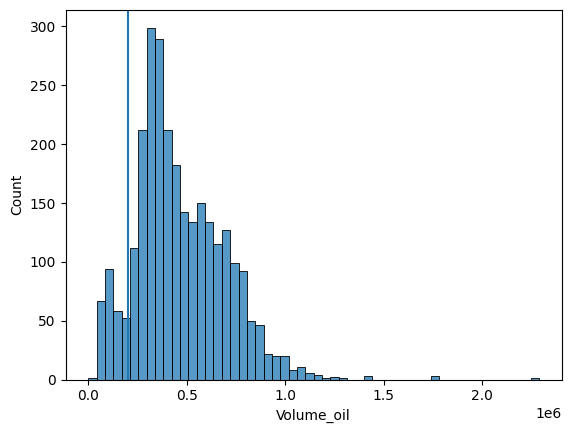

In [67]:
sns.histplot(data.Volume_oil)
plt.axvline(.2*(10**6))

In [68]:
lower_bound_oil = .15*(10**6)

In [69]:
lower_bound_oil

150000.0

In [70]:
# Extract the relevant information for outliers above the upper bound in 'Volume_oil'
low_volume_outliers_oil = data[data['Volume_oil'] <= lower_bound_oil][['Date', 'day_of_week', 'day_of_month', 'day_of_year', 'Volume_oil']]

# Count the occurrences for day of the week, day of month, and day of year
day_of_week_counts_oil = low_volume_outliers_oil['day_of_week'].value_counts()
day_of_month_counts_oil = low_volume_outliers_oil['day_of_month'].value_counts()
day_of_year_counts_oil = low_volume_outliers_oil['day_of_year'].value_counts()

In [71]:
day_of_week_counts_oil

day_of_week
4    36
6    32
5    32
0    32
3    29
2    17
1    16
Name: count, dtype: int64

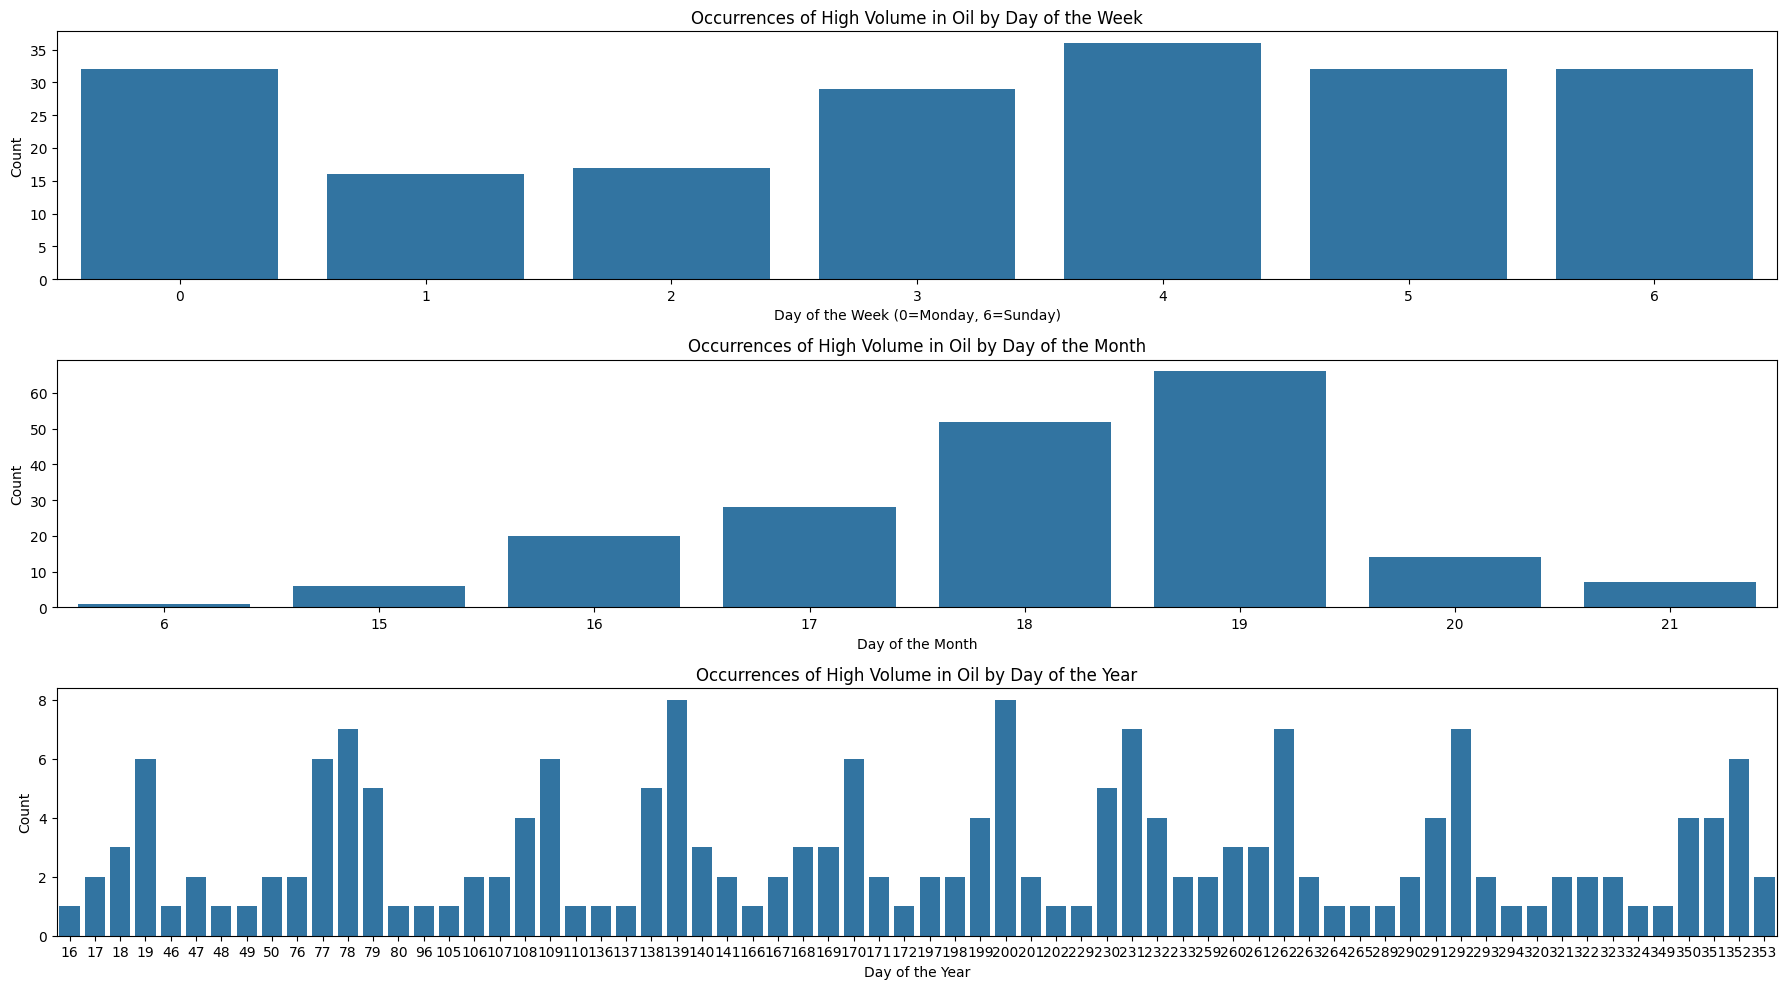

In [72]:
# Plotting the counts for day of the week, day of month, and day of year for 'Volume_oil'
plt.figure(figsize=(18, 10))

# Day of the Week
plt.subplot(3, 1, 1)
sns.barplot(x=day_of_week_counts_oil.index, y=day_of_week_counts_oil.values)
plt.title('Occurrences of High Volume in Oil by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')

# Day of the Month
plt.subplot(3, 1, 2)
sns.barplot(x=day_of_month_counts_oil.index, y=day_of_month_counts_oil.values)
plt.title('Occurrences of High Volume in Oil by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')

# Day of the Year
plt.subplot(3, 1, 3)
sns.barplot(x=day_of_year_counts_oil.index, y=day_of_year_counts_oil.values)
plt.title('Occurrences of High Volume in Oil by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# find correlations in data

In [ ]:
correlation_matrix = data[['Close_btc', 'Close_gold', 'Close_oil', 'Close_sp500']].corr()

# Display the correlation matrix
correlation_matrix

In [ ]:
correlation_matrix = data[['Close_btc', 'Close_gold', 'Close_oil', 'Close_sp500']].corr()

# Display the correlation matrix
correlation_matrix

In [ ]:
# Forward fill method to handle NaN values
data_filled = data.copy()
data_filled['Date'] = pd.to_datetime(data_filled['Date'])
data_filled = data_filled.sort_values(by='Date')  # Ensure the data is sorted by date
data_filled = data_filled.fillna(method='ffill')

# Verify if there are any remaining NaN values
remaining_nans = data_filled.isnull().sum()

# Add a column for the weekday
data_filled['Weekday'] = data_filled['Date'].dt.day_name()

# Check for relationships with the weekday by calculating mean prices per weekday
weekday_analysis = data_filled.groupby('Weekday').mean()

# Fourier transform on closing prices of Bitcoin to detect periodic patterns
import numpy as np
from scipy.fft import fft

# Remove the trend (detrending) by subtracting the mean
# Perform the Fourier Transform again on correctly formatted data
btc_prices = data_filled['Close_btc'].values - data_filled['Close_btc'].mean()
btc_fft = fft(btc_prices)

# Frequency and power spectrum
freq = np.fft.fftfreq(len(btc_prices))
power_spectrum = np.abs(btc_fft)**2

# Sorting the weekday analysis to maintain the correct order (Monday to Sunday)
weekday_analysis = data_filled.groupby('Weekday').mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_analysis, freq[:10], power_spectrum[:10]  # Displaying for brevity


In [ ]:
weekday_analysis.

In [ ]:
from statsmodels.tsa.seasonal import STL


In [ ]:
# Let's focus on the price change percentage columns for Bitcoin, Gold, and Oil.
# Perform STL decomposition and Fourier Transform for these columns.

# STL Decomposition for Bitcoin Price Change Percentage
stl_btc_change = STL(data_filled['Close_btc'].dropna(), period=7)
result_btc_change = stl_btc_change.fit()

# STL Decomposition for Gold Price Change Percentage
stl_gold_change = STL(data_filled['Close_gold'].dropna(), period=7)
result_gold_change = stl_gold_change.fit()

# STL Decomposition for Oil Price Change Percentage
stl_oil_change = STL(data_filled['Close_oil'].dropna(), period=7)
result_oil_change = stl_oil_change.fit()

# Plot STL decomposition for each asset separately
plt.figure(figsize=(14, 8))
result_btc_change.plot()
plt.suptitle("STL Decomposition of Bitcoin Price Change (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
result_gold_change.plot()
plt.suptitle("STL Decomposition of Gold Price Change (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
result_oil_change.plot()
plt.suptitle("STL Decomposition of Oil Price Change (%)")
plt.tight_layout()
plt.show()



In [ ]:
# Ensuring the data is correctly aligned for the FFT operation
btc_change_series = data_filled['Close_btc'].dropna().values
gold_change_series = data_filled['Close_gold'].dropna().values
oil_change_series = data_filled['Close_oil'].dropna().values

# Recompute the Fourier Transform for each series
btc_change_fft = fft(btc_change_series)
gold_change_fft = fft(gold_change_series)
oil_change_fft = fft(oil_change_series)

# Frequency and power spectrum for each asset
btc_freq = np.fft.fftfreq(len(btc_change_series))
gold_freq = np.fft.fftfreq(len(gold_change_series))
oil_freq = np.fft.fftfreq(len(oil_change_series))

btc_power_spectrum = np.abs(btc_change_fft)**2
gold_power_spectrum = np.abs(gold_change_fft)**2
oil_power_spectrum = np.abs(oil_change_fft)**2

# Dominant frequencies for each asset
dominant_btc_frequencies = btc_freq[1:][np.argsort(btc_power_spectrum[1:])[::-1][:5]]
dominant_gold_frequencies = gold_freq[1:][np.argsort(gold_power_spectrum[1:])[::-1][:5]]
dominant_oil_frequencies = oil_freq[1:][np.argsort(oil_power_spectrum[1:])[::-1][:5]]

# Convert frequencies to periods (in terms of days)
dominant_btc_periods = 1 / dominant_btc_frequencies
dominant_gold_periods = 1 / dominant_gold_frequencies
dominant_oil_periods = 1 / dominant_oil_frequencies

# Creating a summary table for dominant periods
dominant_periods_summary = pd.DataFrame({
    'BTC Frequency': dominant_btc_frequencies,
    'BTC Period (days)': dominant_btc_periods,
    'Gold Frequency': dominant_gold_frequencies,
    'Gold Period (days)': dominant_gold_periods,
    'Oil Frequency': dominant_oil_frequencies,
    'Oil Period (days)': dominant_oil_periods
})

dominant_periods_summary
